In [1]:
import pandas as pd
from dataclasses import dataclass
from tracking import *
import logging
import bao

# Configure logging to show INFO level messages
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

In [2]:
weight_vn30 = pd.read_parquet("./data/weight_vn30.parquet")
tracking_instance = Tracking(
    path="./data/stock/",
    path_dictionary="./stock_dictionary.json",
    remove_current_year=True,
    weight=weight_vn30,
    risk_free_rate=0.05,
)
data = tracking_instance.stocks_data
market = tracking_instance.market_data

2025-01-17 16:14:24,164 - INFO - Max time in merged data: 2025-01-17 00:00:00
2025-01-17 16:14:24,357 - INFO - Summary of tickers by exchange: {'DELISTED': 611, 'HNX': 313, 'HSX': 500, 'UPCOM': 884}


In [3]:
# Testing with the holding time is 3 years and market benchmark is VN100 (vni)
test, summa = tracking_instance.all_port_summary(
    keep_period=2, market_selection="vni", return_col="return"
)

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


period_return       std      beta  period_return_market  market_std  \
0         0.037267  0.012952  0.930231              0.115091    0.012239   
1         0.046840  0.012629  0.909130              0.115091    0.012239   
2         0.069865  0.012496  0.892445              0.115091    0.012239   
3         0.100727  0.012401  0.880876              0.115091    0.012239   
4         0.128535  0.012327  0.870771              0.115091    0.012239   
..             ...       ...       ...                   ...         ...   
193       0.478166  0.019947  1.532840              0.272074    0.009702   
194       0.458318  0.019993  1.557222              0.272074    0.009702   
195       0.484759  0.019293  1.504772              0.272074    0.009702   
196       0.511200  0.018798  1.452321              0.272074    0.009702   
197       0.537642  0.018524  1.399870              0.272074    0.009702   

     tracking_error  information_ratio  sortino_ratio  modified_sharpe_ratio  \
0          0.006269          -0.024601      -1.182196             -75.907193   
1          0.006112          -0.022116      -0.298372             -19.811489   
2          0.006244          -0.014312       1.901302             127.218136   
3          0.006331          -0.004417       4.951262             329.865377   
4          0.006425           0.004257       7.706737             516.820491   
..              ...                ...            ...                    ...   
193        0.014297           0.028218      31.353722            1076.094178   
194        0.014200           0.025543      29.615784            1021.500508   
195        0.013557           0.030335      32.405715            1168.024079   
196        0.013213           0.034800      35.026711            1305.204152   
197        0.013191           0.038540      37.311534            1421.133477   

     calmar_ratio  ...  cumulative_tracking_error  \
0       -0.109034  ...                   0.033066   
1       -0.027642  ...                   0.038000   
2        0.177227  ...                   0.044196   
3        0.459697  ...                   0.056304   
4        0.697612  ...                   0.068789   
..            ...  ...                        ...   
193      2.940334  ...                   0.190240   
194      2.733911  ...                   0.194777   
195      2.823350  ...                   0.202175   
196      2.905094  ...                   0.212510   
197      2.981838  ...                   0.225205   

     cumulative_information_ratio  cumulative_sortino_ratio  \
0                       -3.434596                         0   
1                       -2.597571                         0   
2                       -1.863789                         0   
3                       -0.886875                         0   
4                       -0.214480                         0   
..                            ...                       ...   
193                      1.911103                         0   
194                      1.772416                         0   
195                      2.006056                         0   
196                      2.187247                         0   
197                      2.320657                         0   

     cumulative_modified_sharpe_ratio  cumulative_calmar_ratio  \
0                           -1.933257                -0.026276   
1                           -0.491615                -0.006681   
2                            3.098234                 0.043341   
3                            7.763657                 0.116873   
4                           11.119783                 0.173656   
..                                ...                      ...   
193                          3.653229                 0.339422   
194                          3.502843                 0.297116   
195                          3.416065                 0.323698   
196                          3.316718                 0.351937   
197        

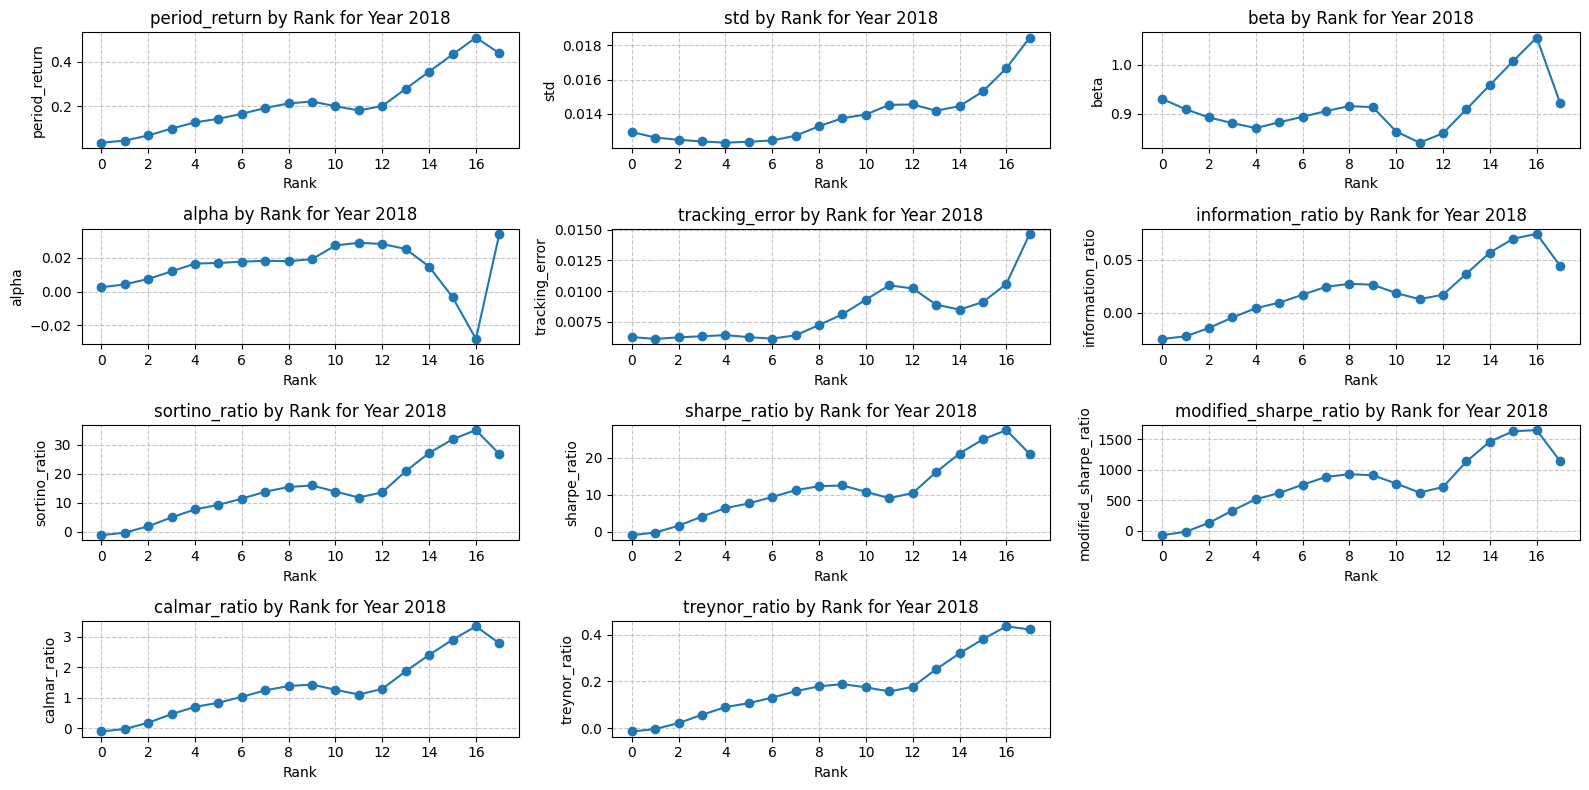

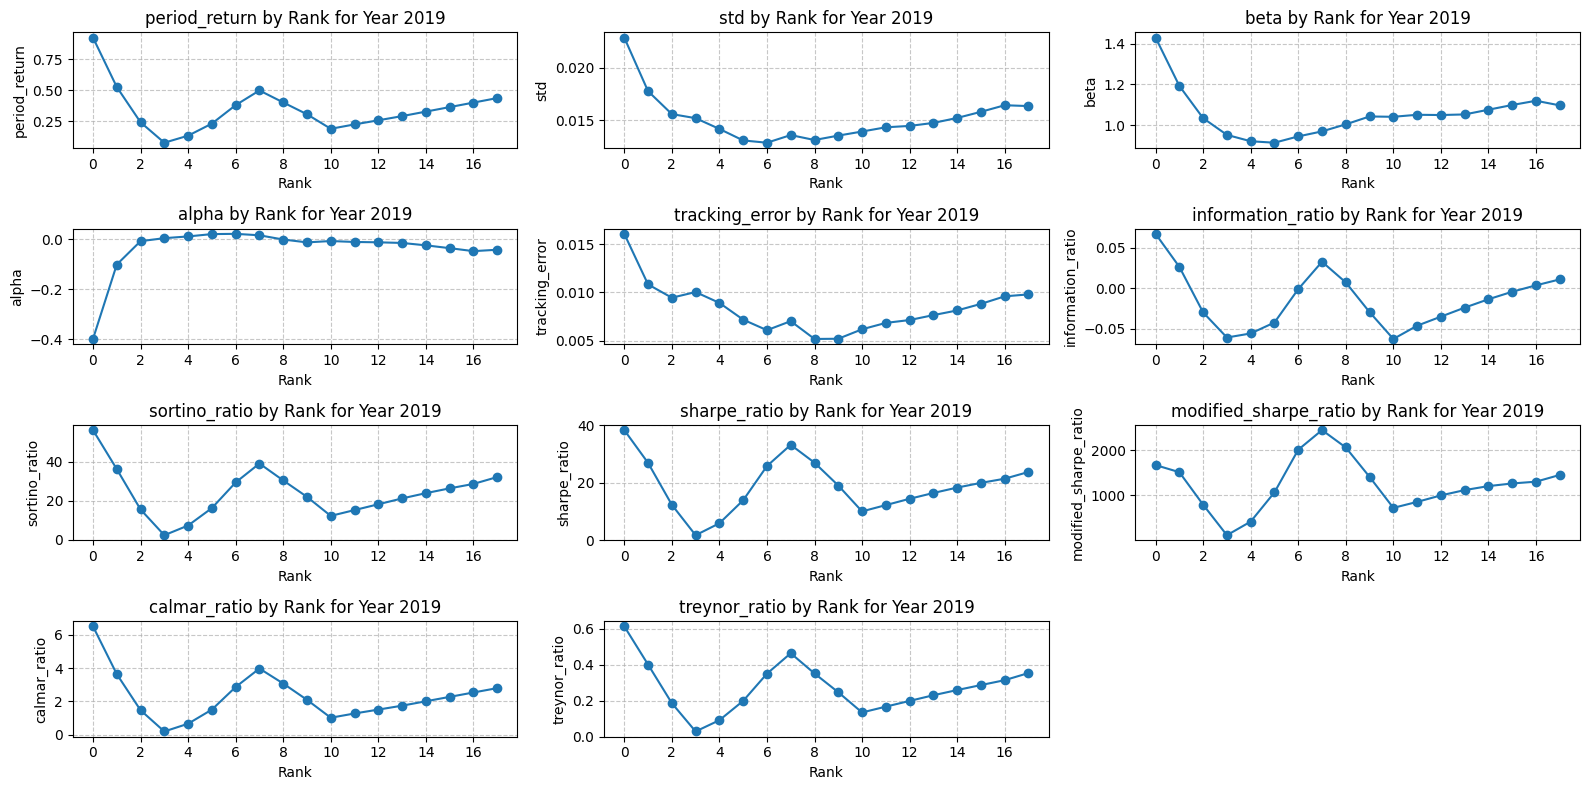

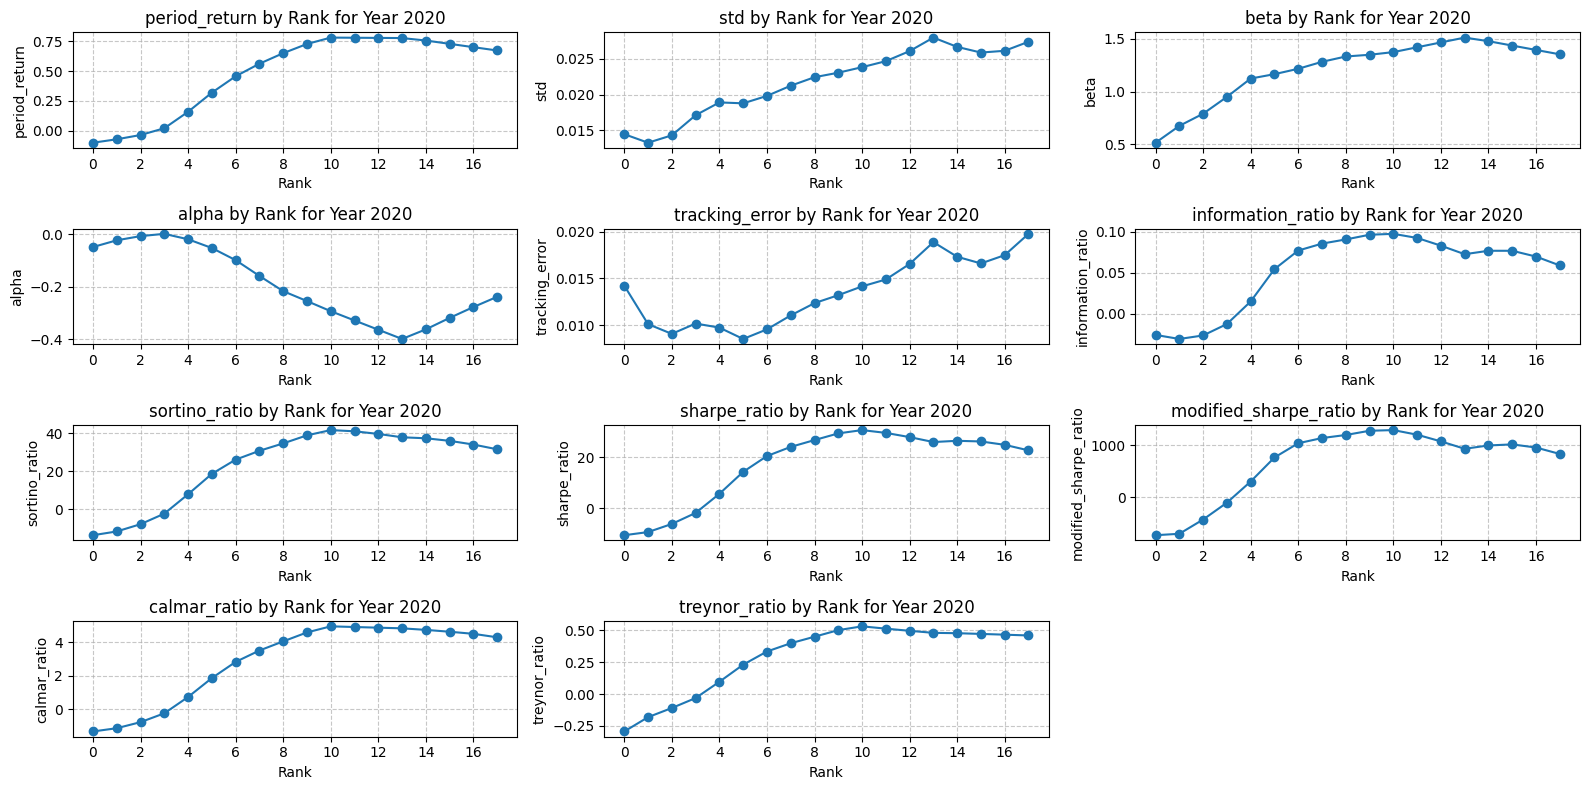

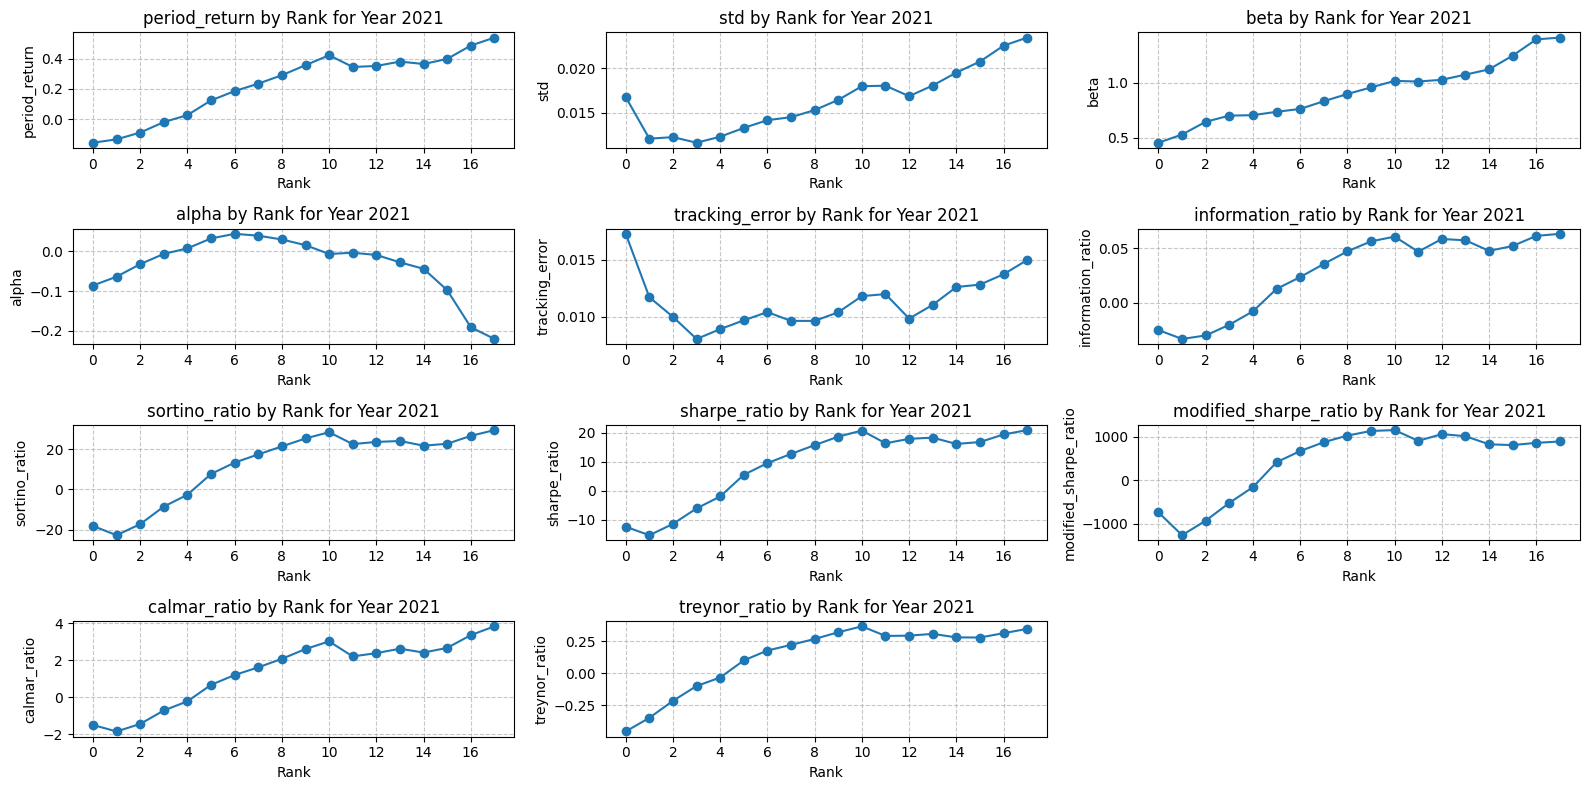

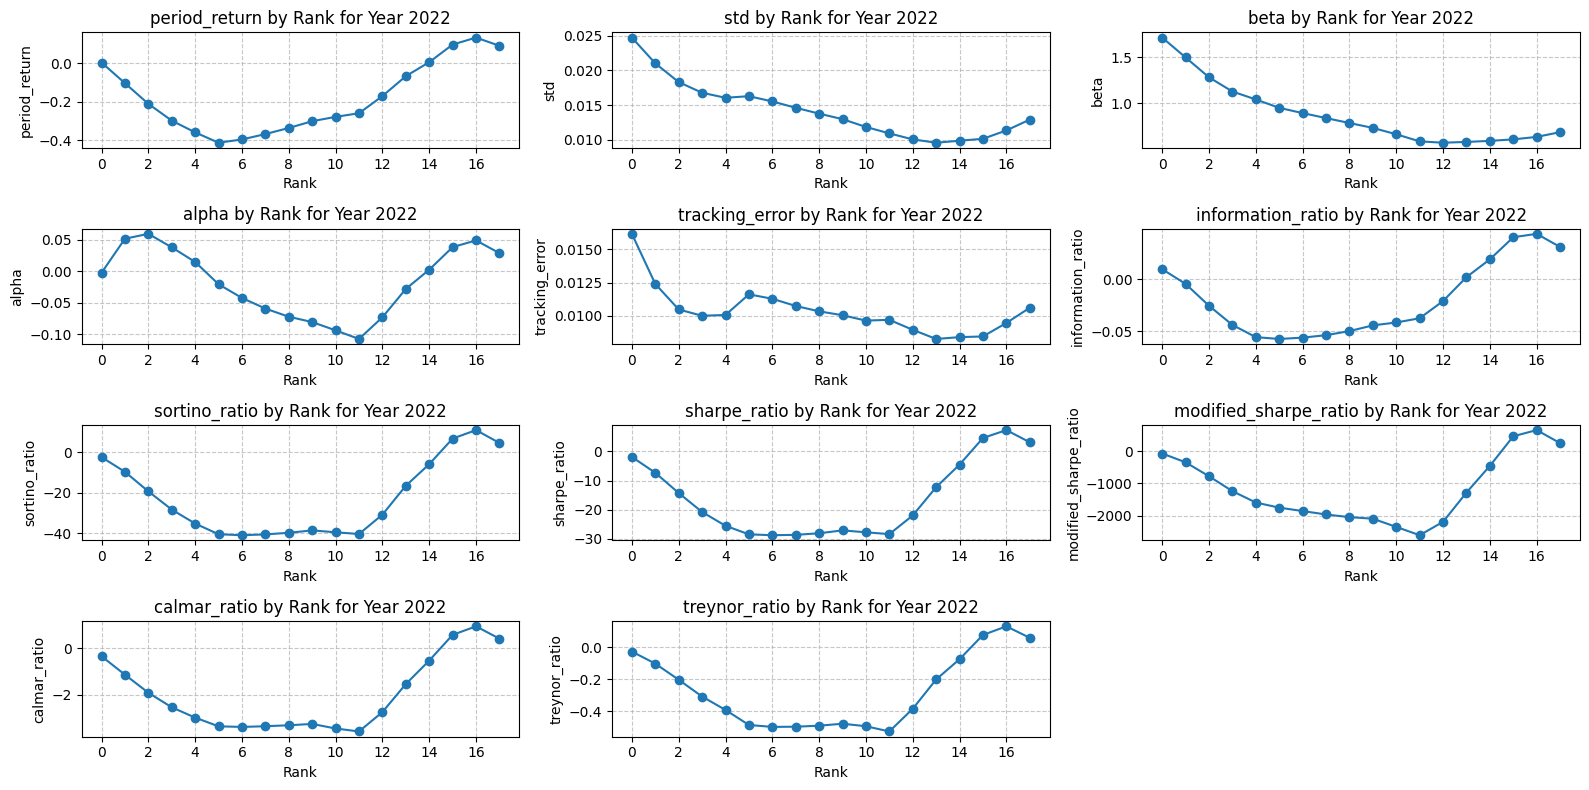

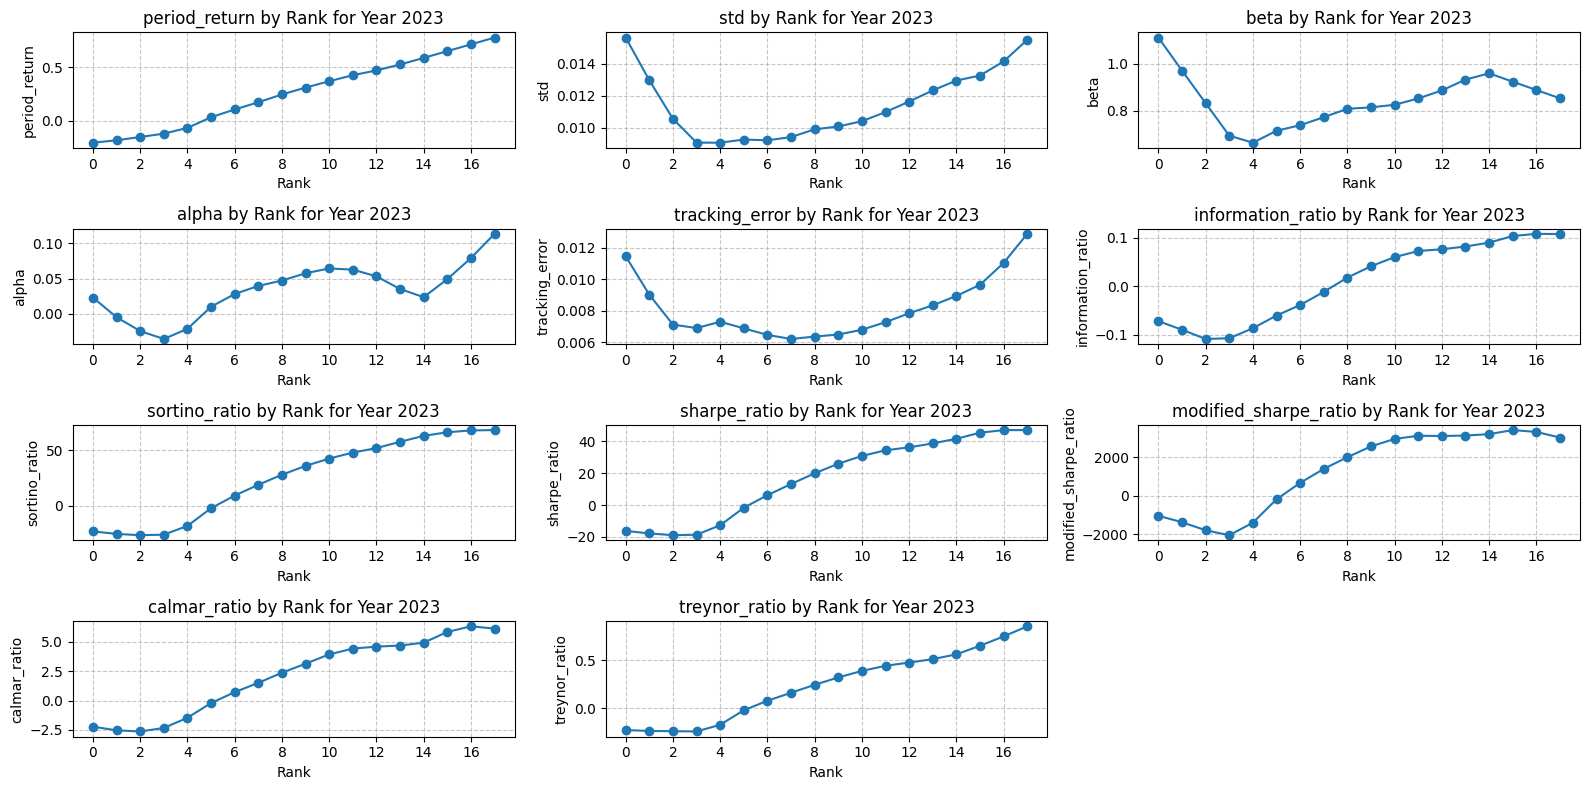

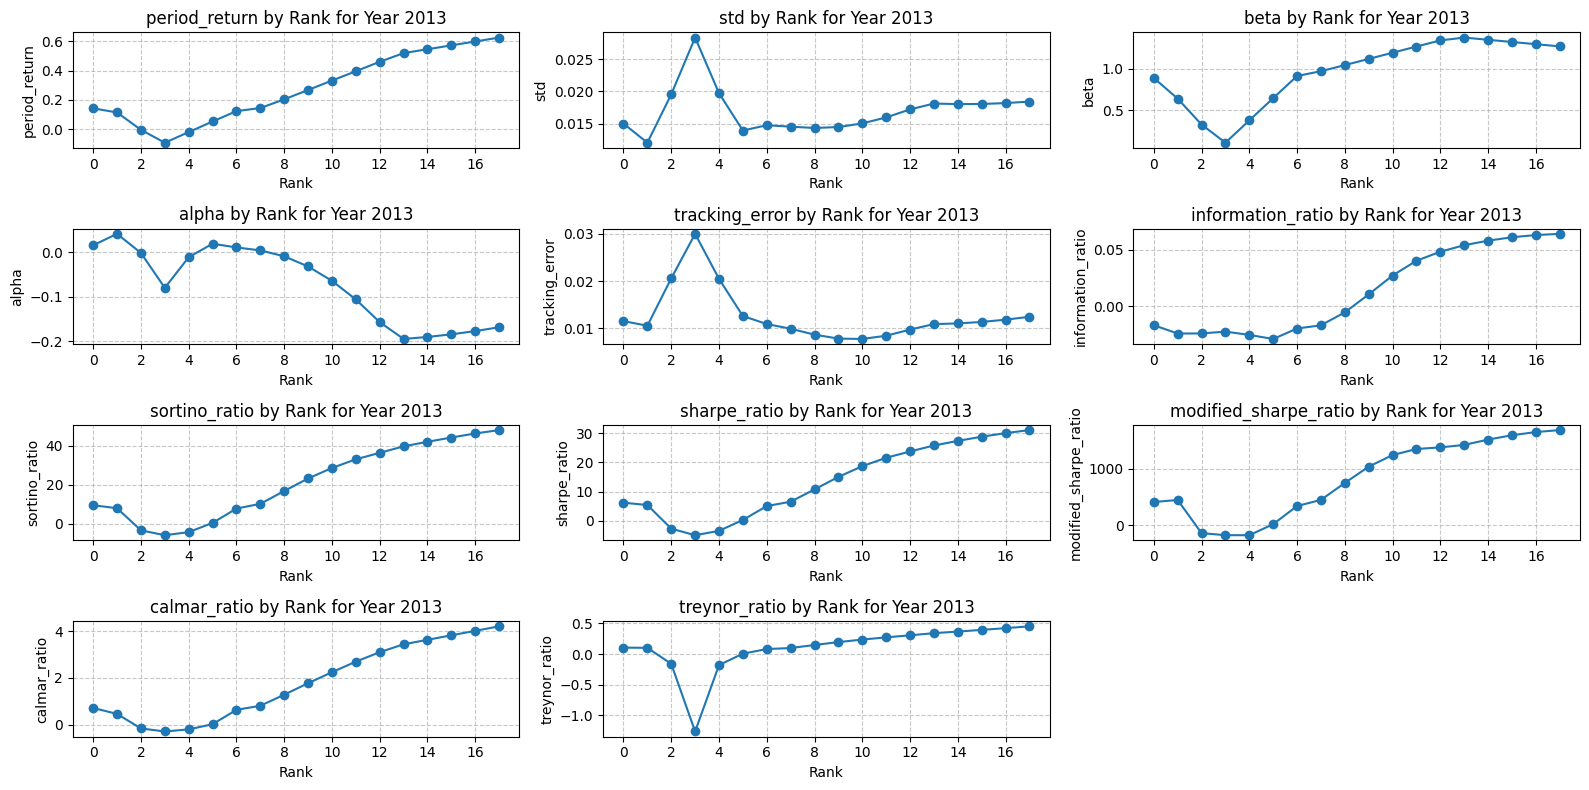

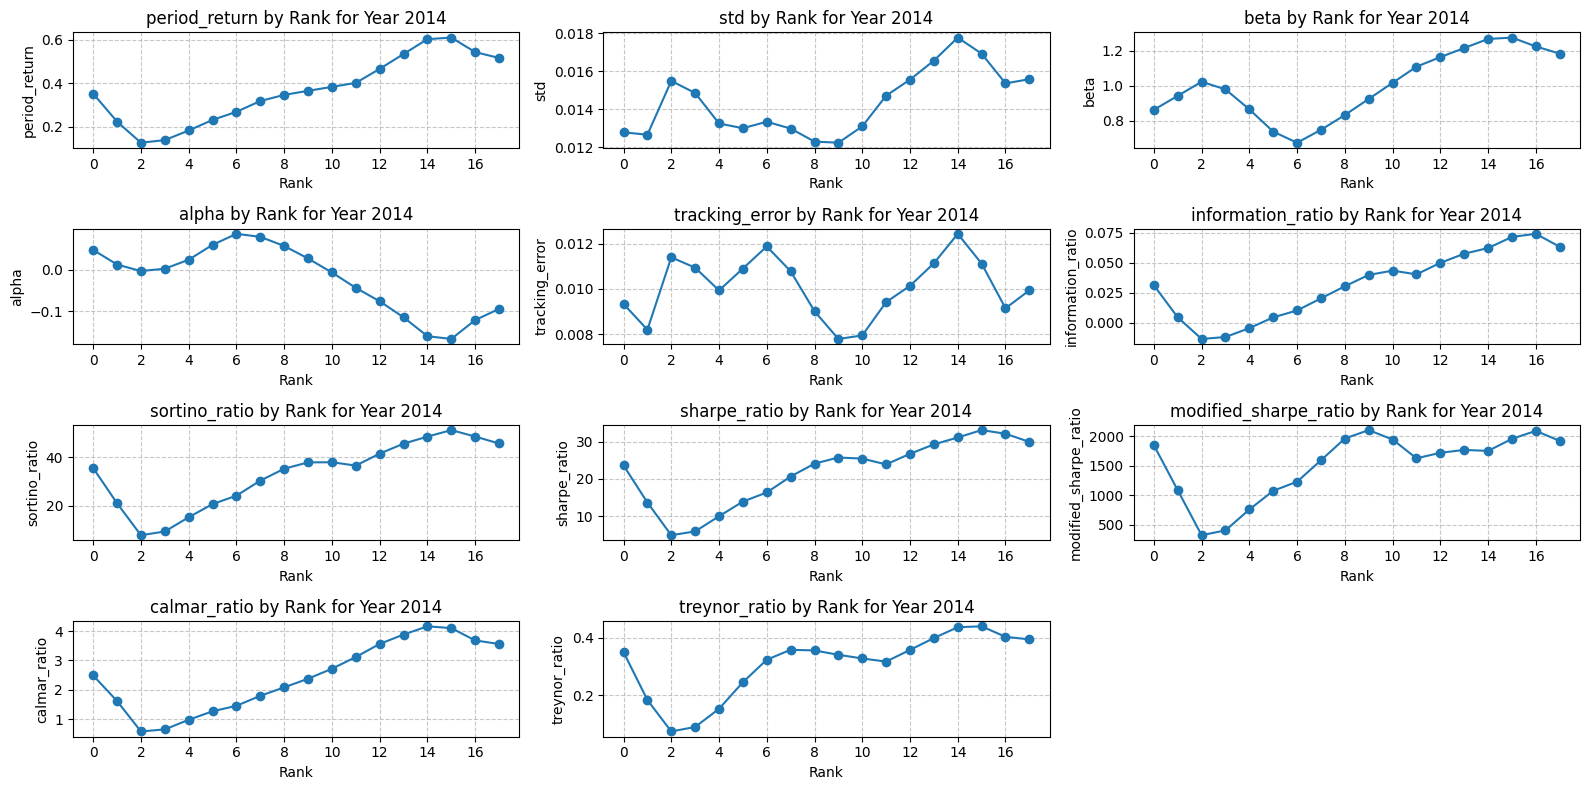

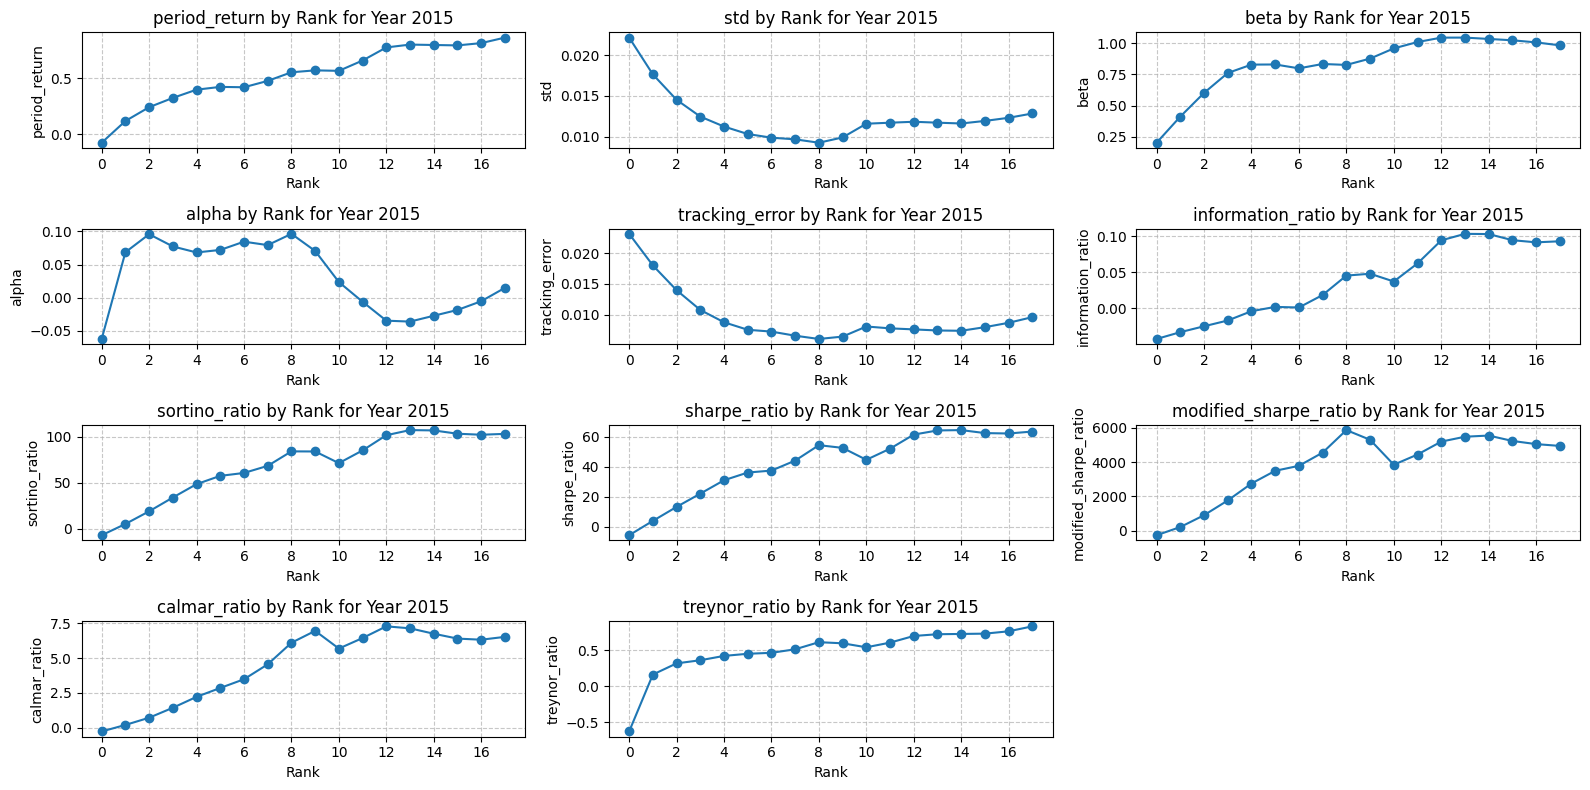

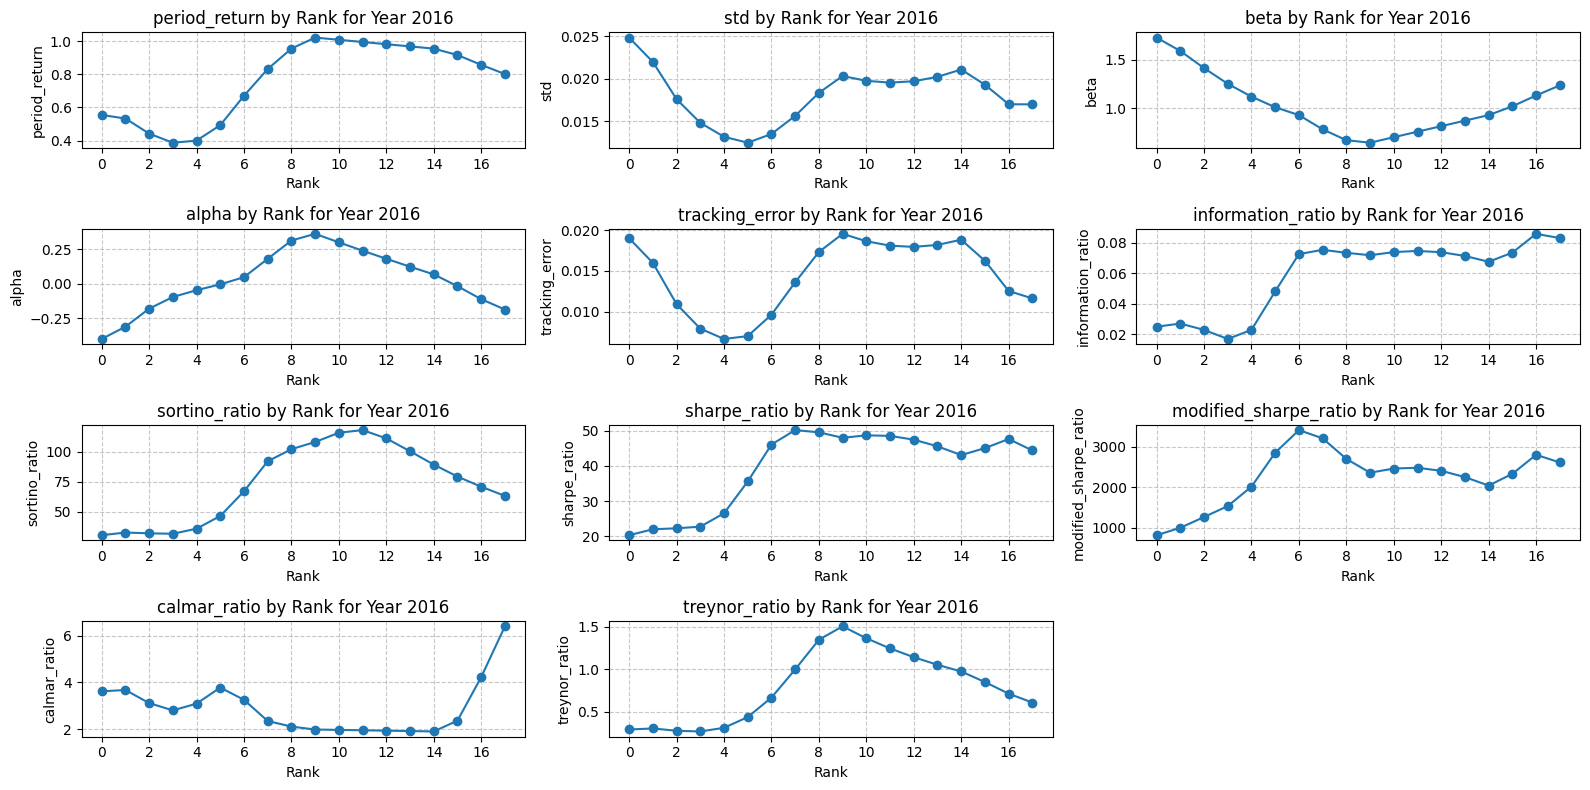

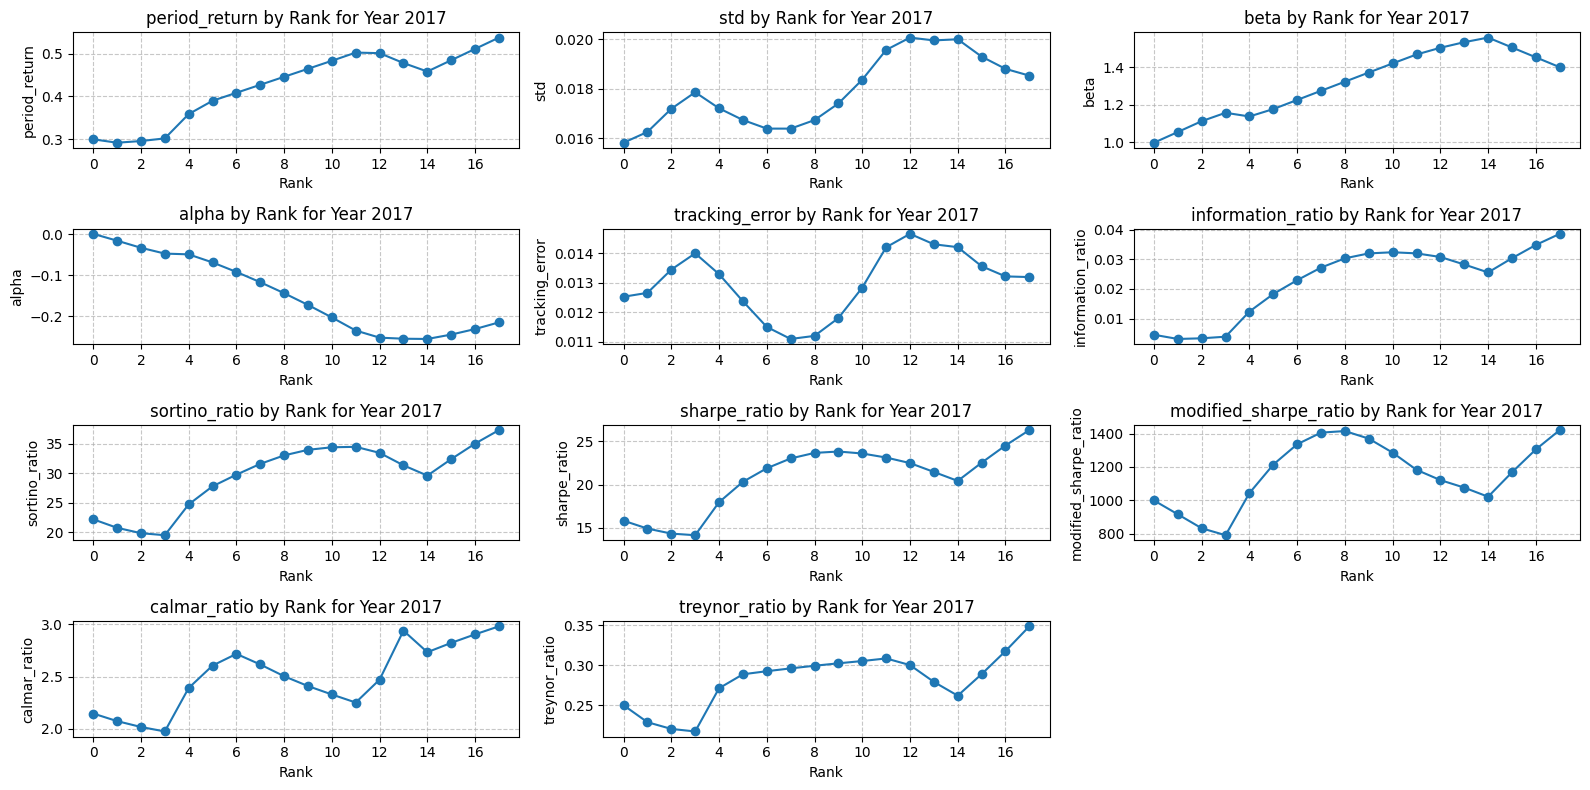

In [16]:
for i in summa['year_train'].unique():
    plot_year_attributes(summa, i, 'all')


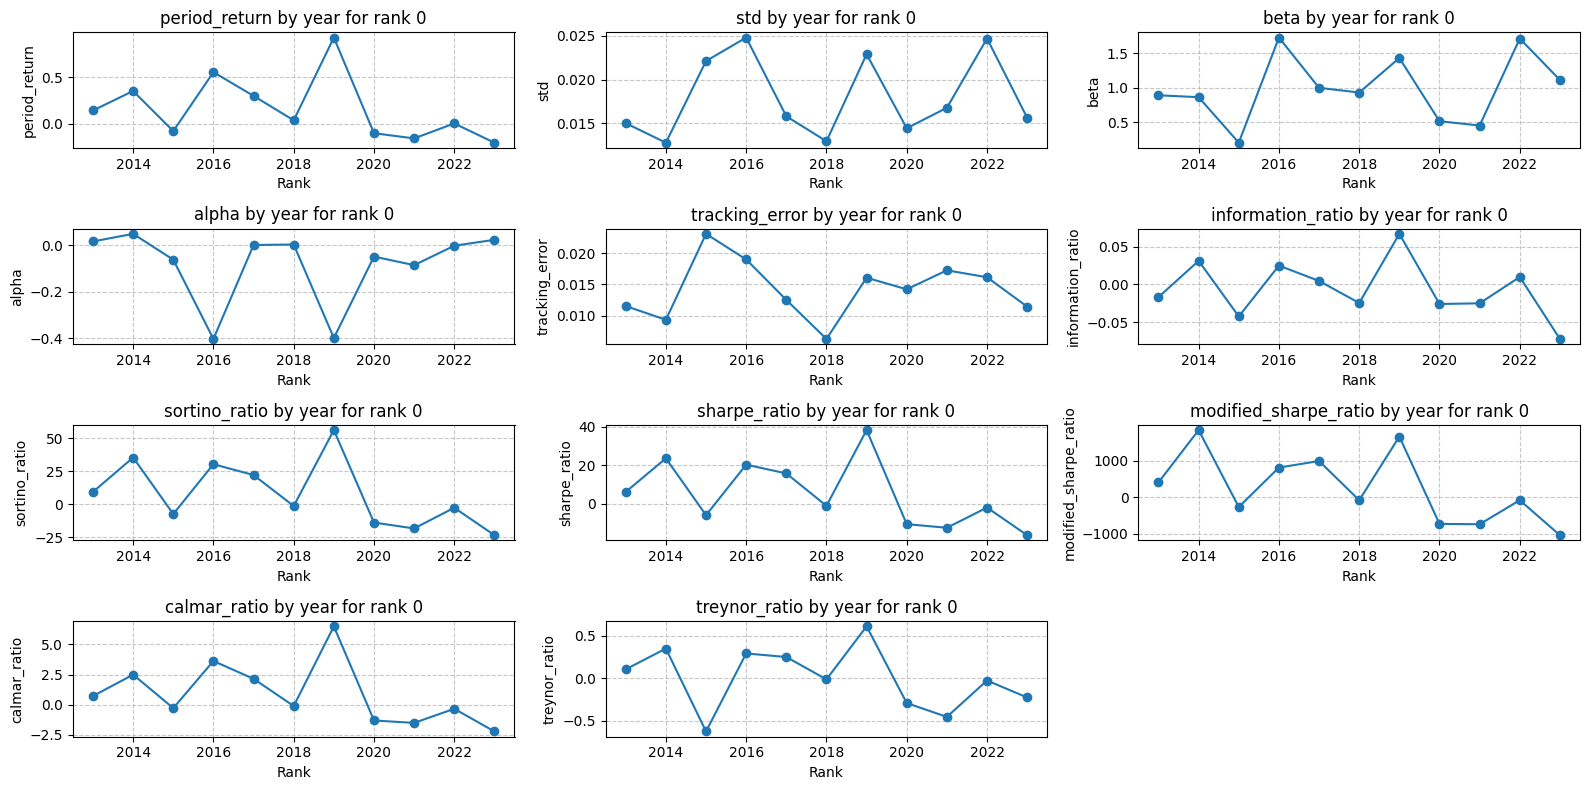

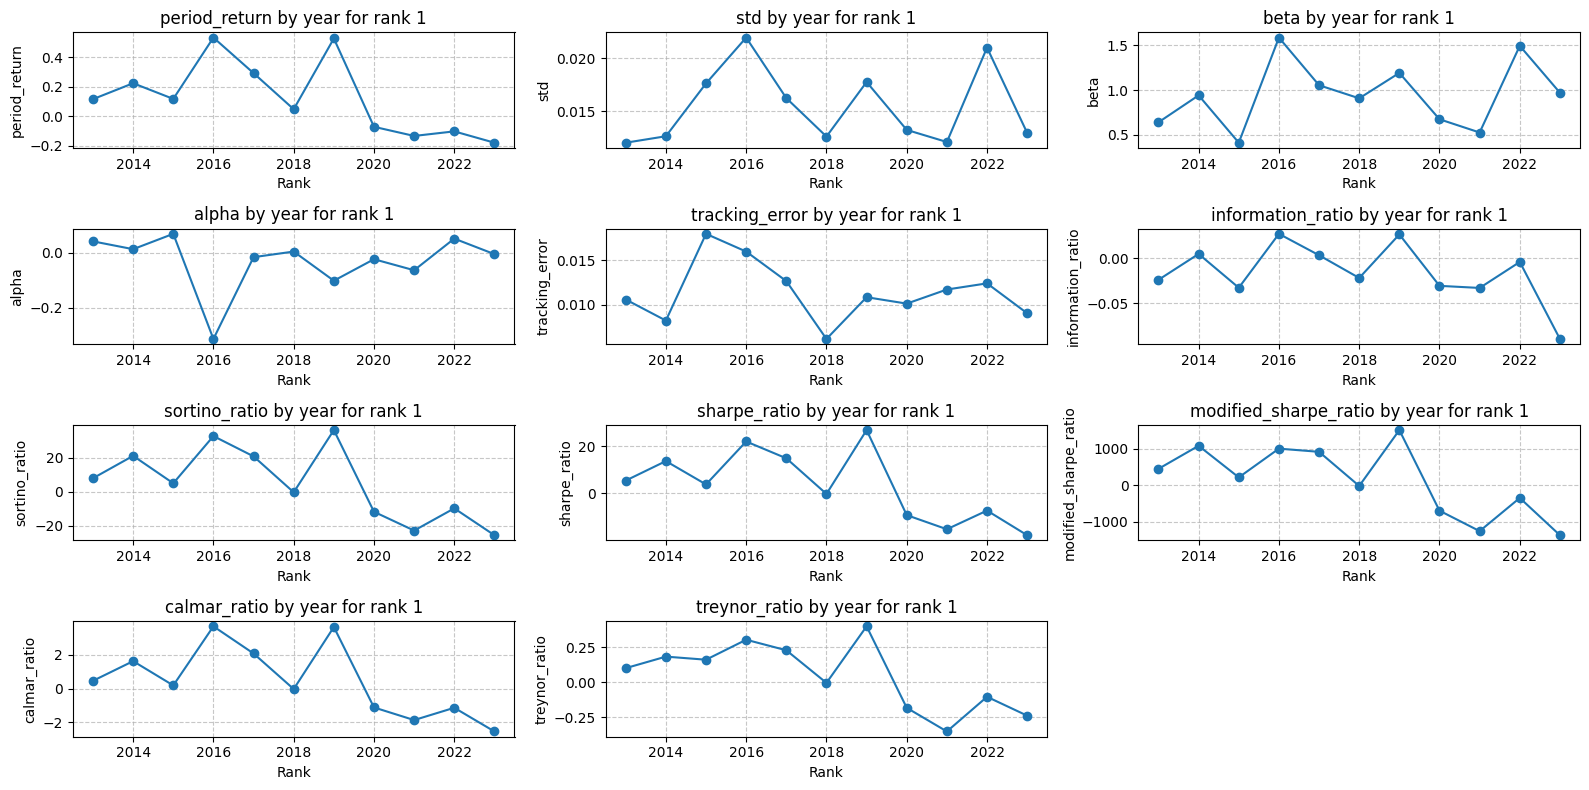

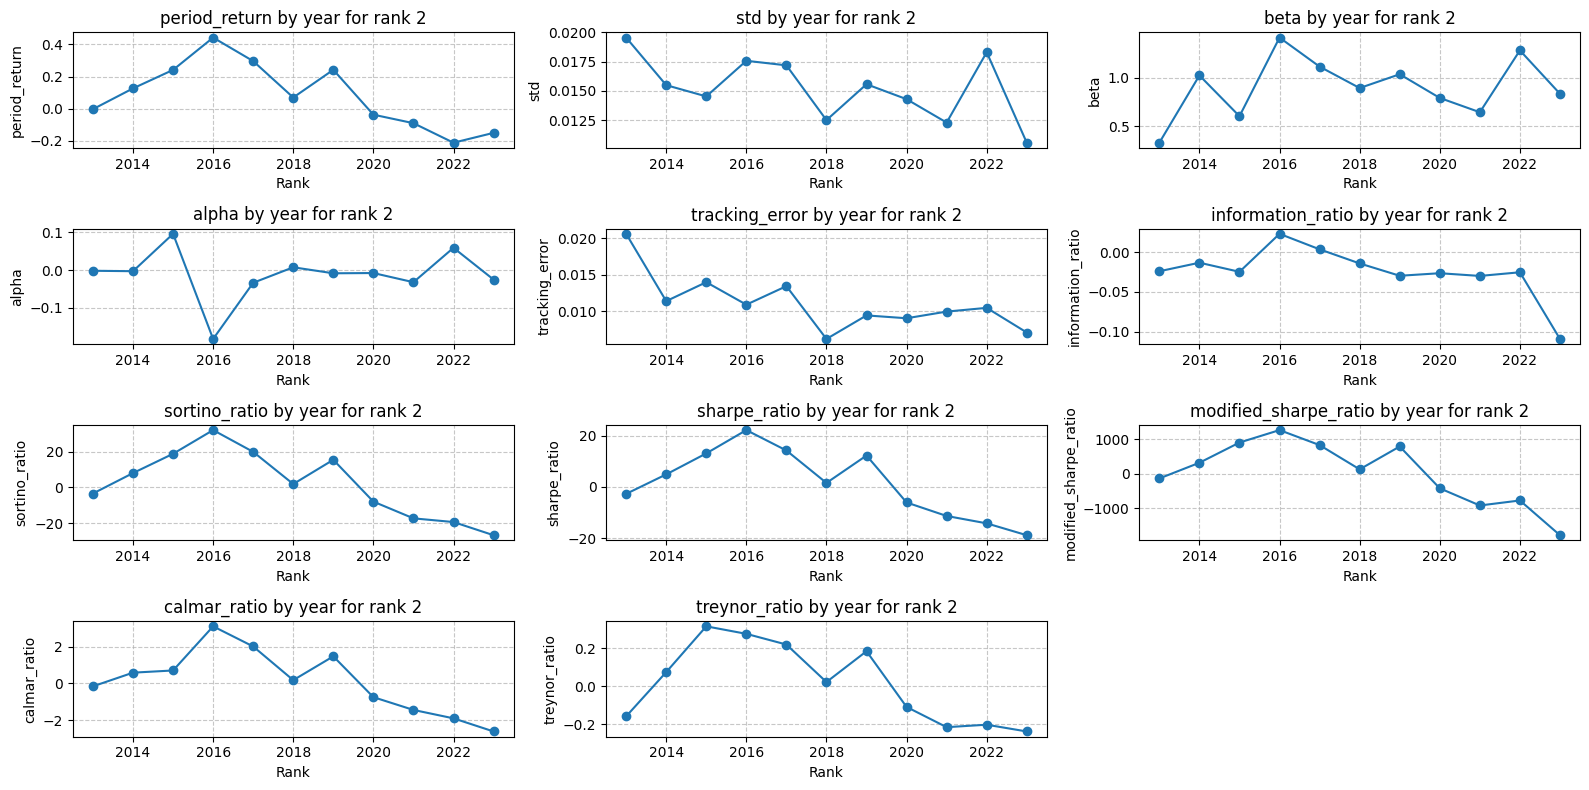

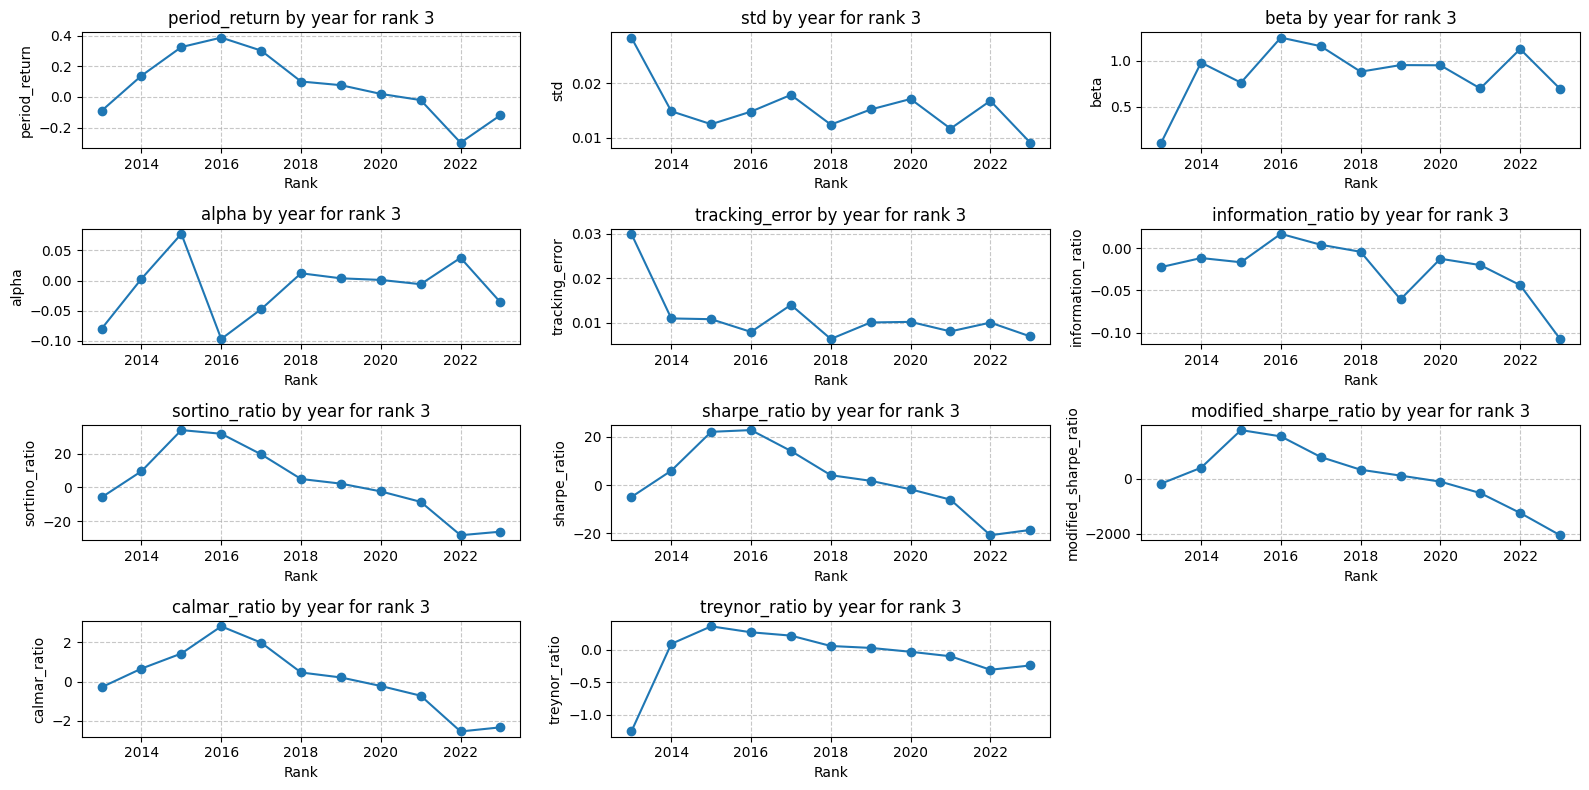

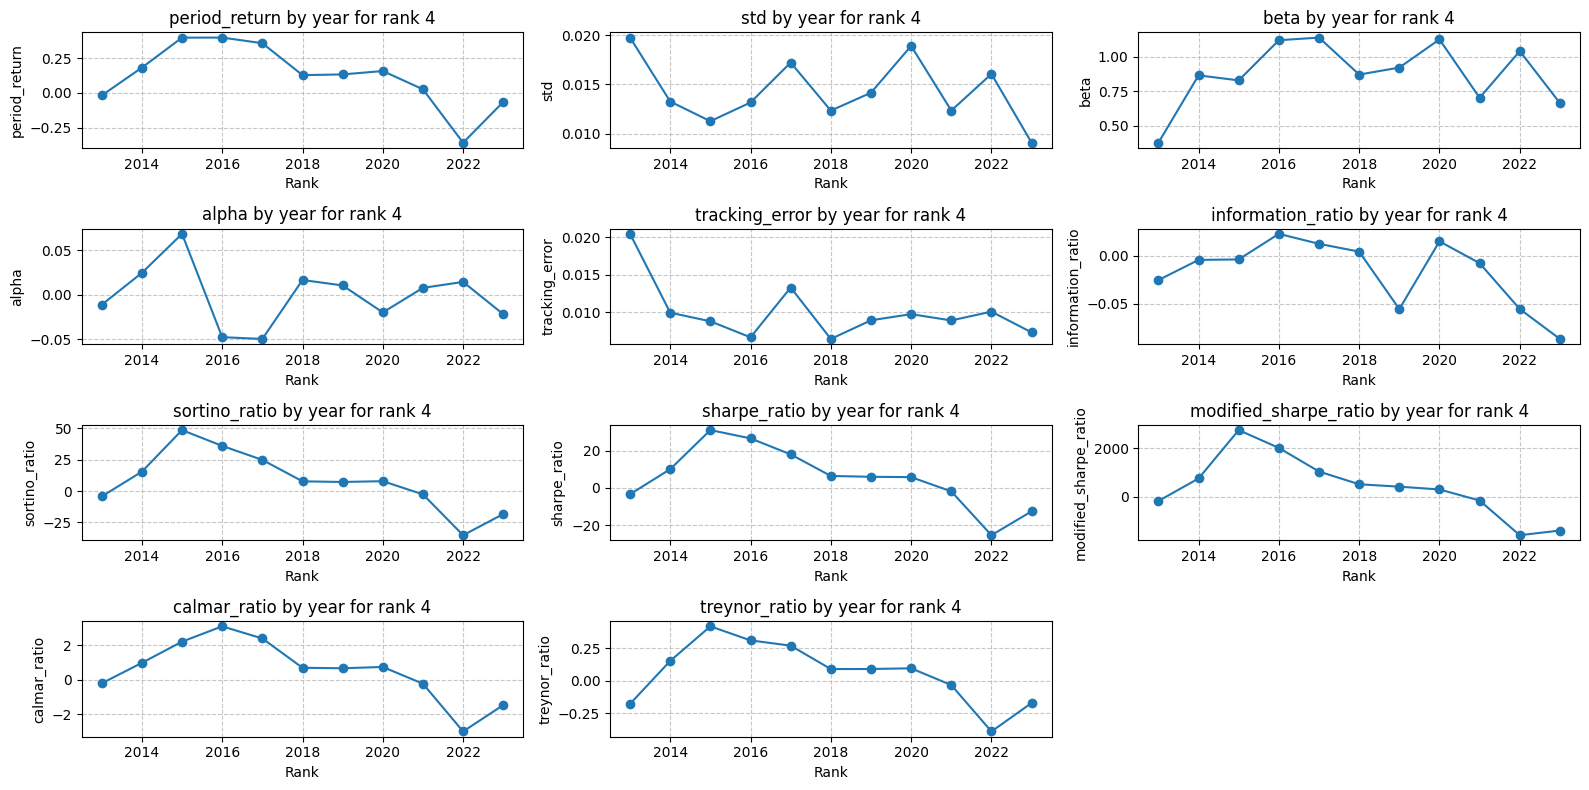

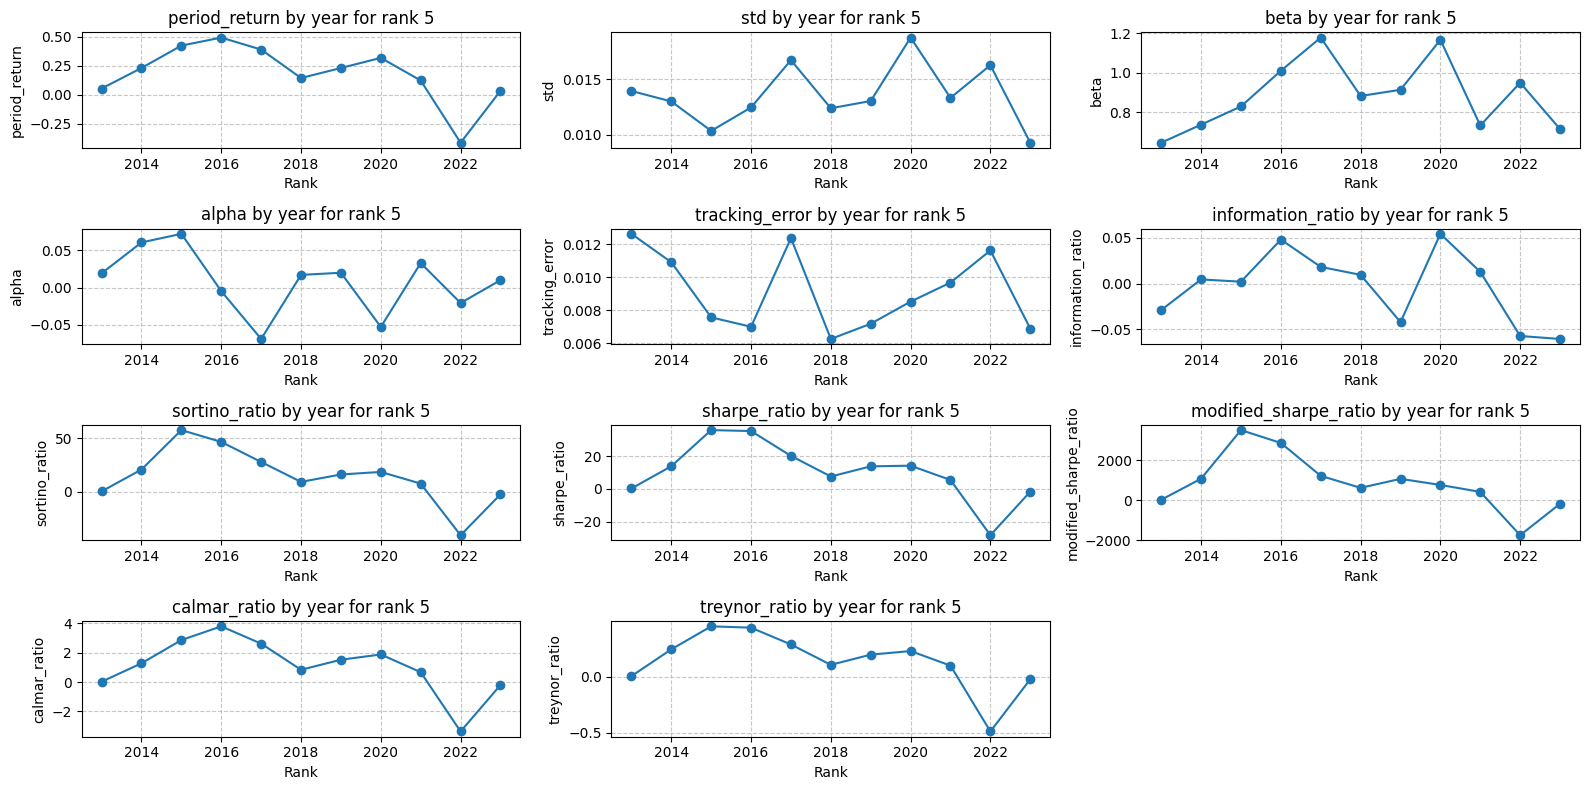

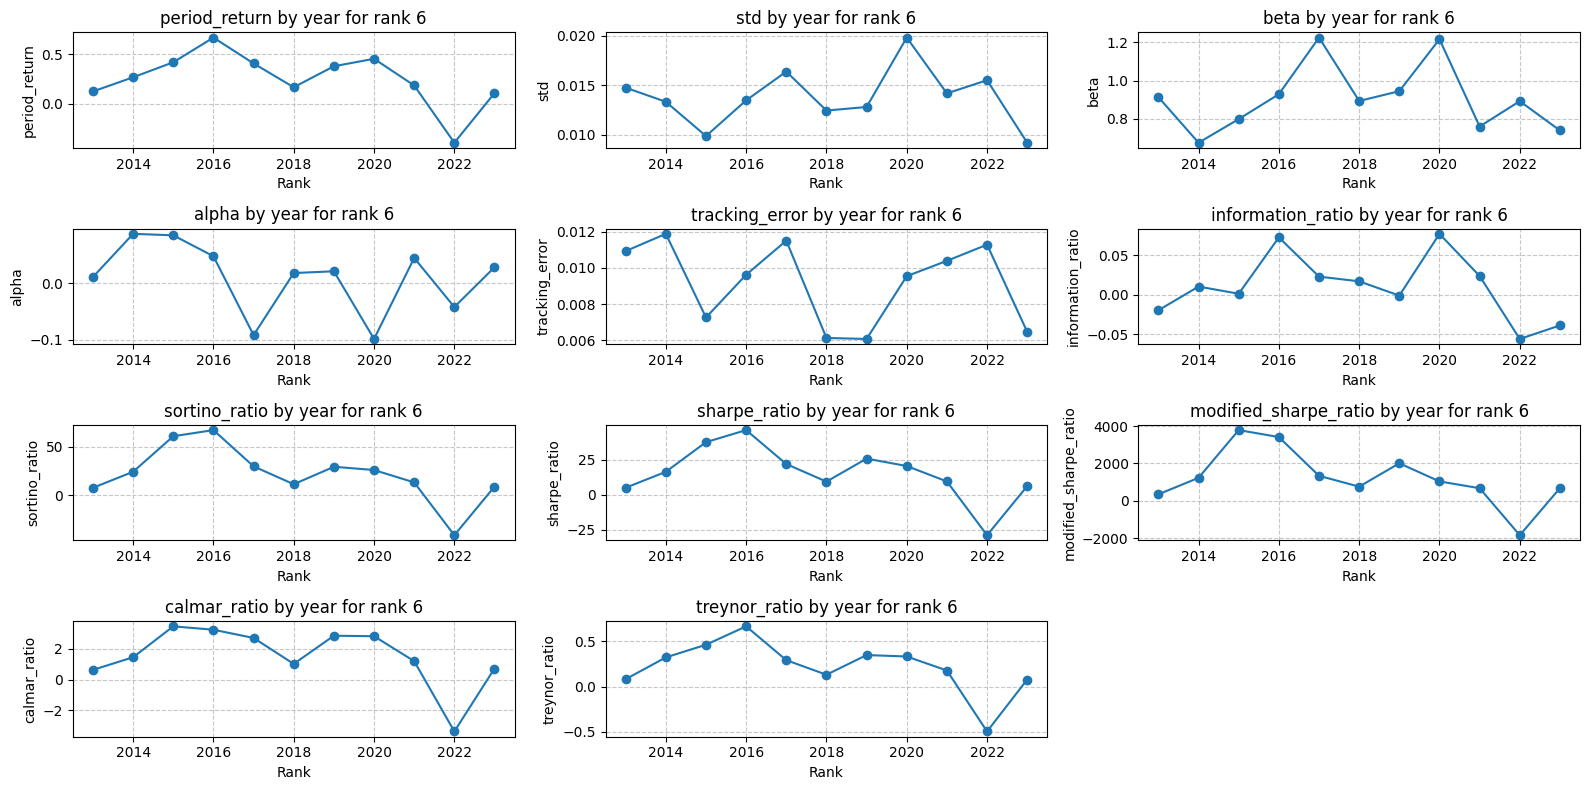

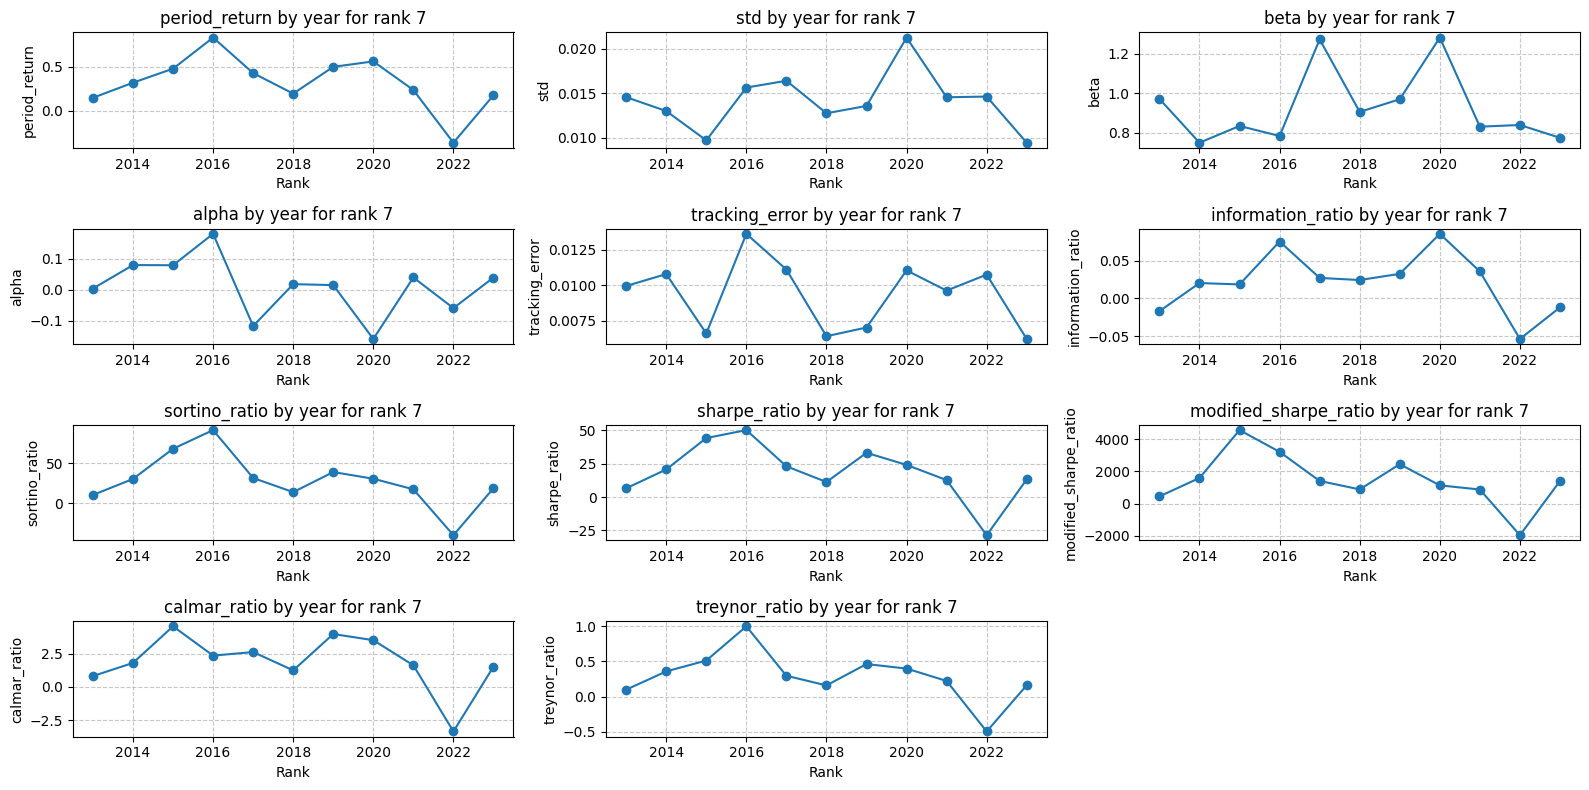

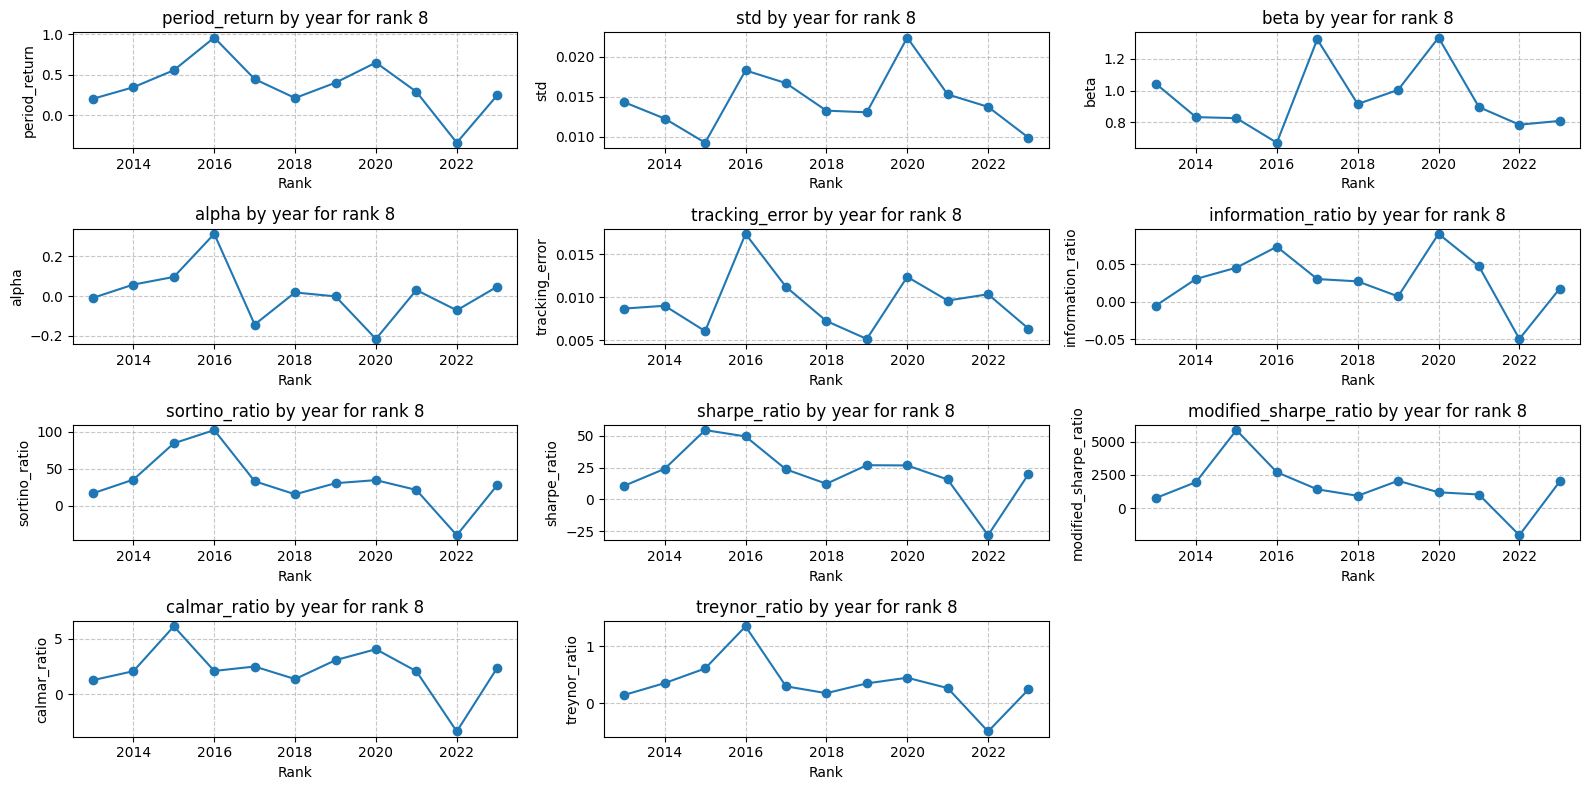

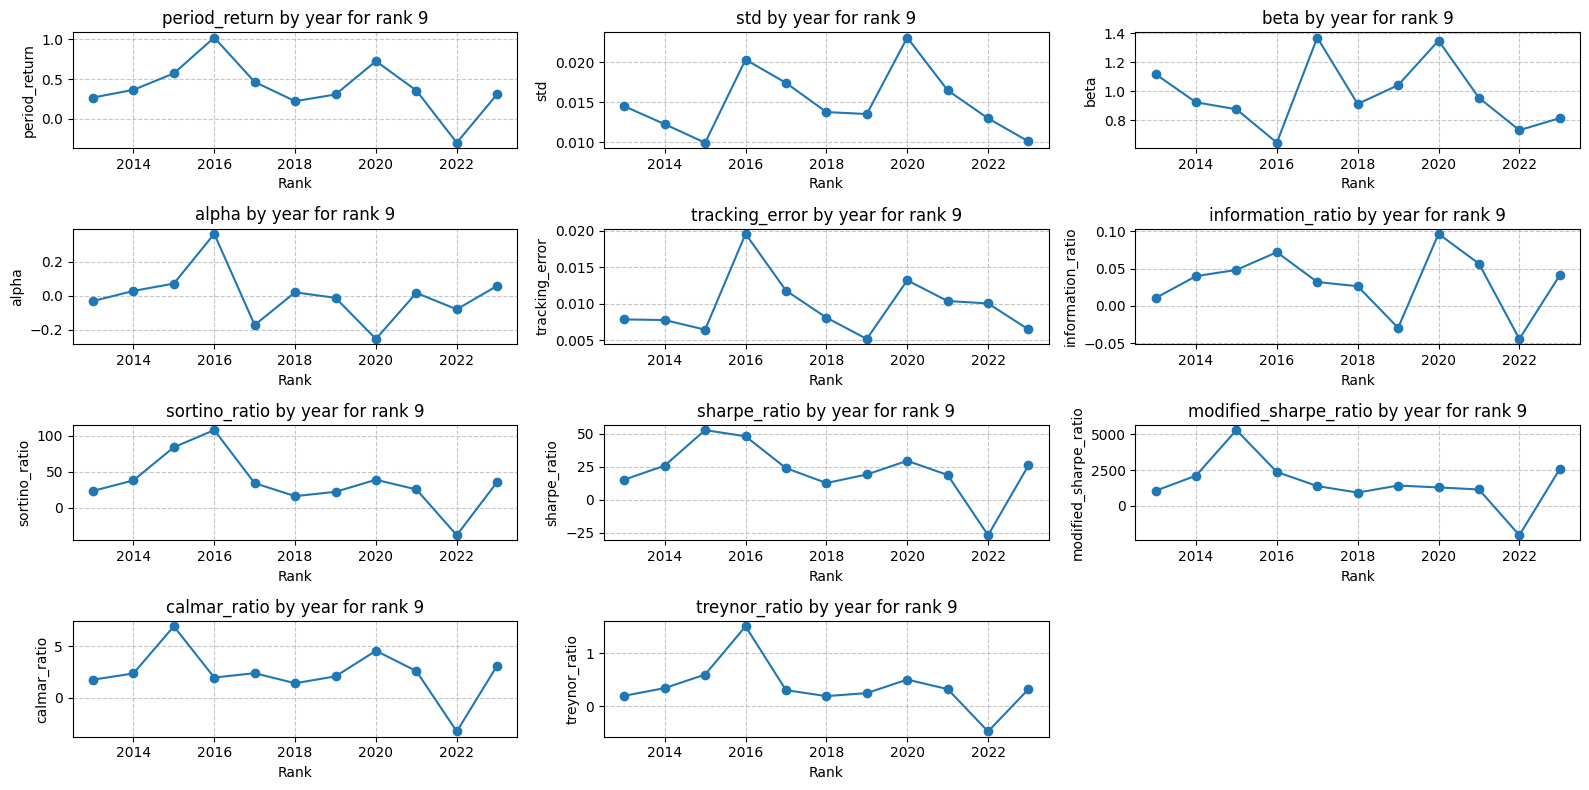

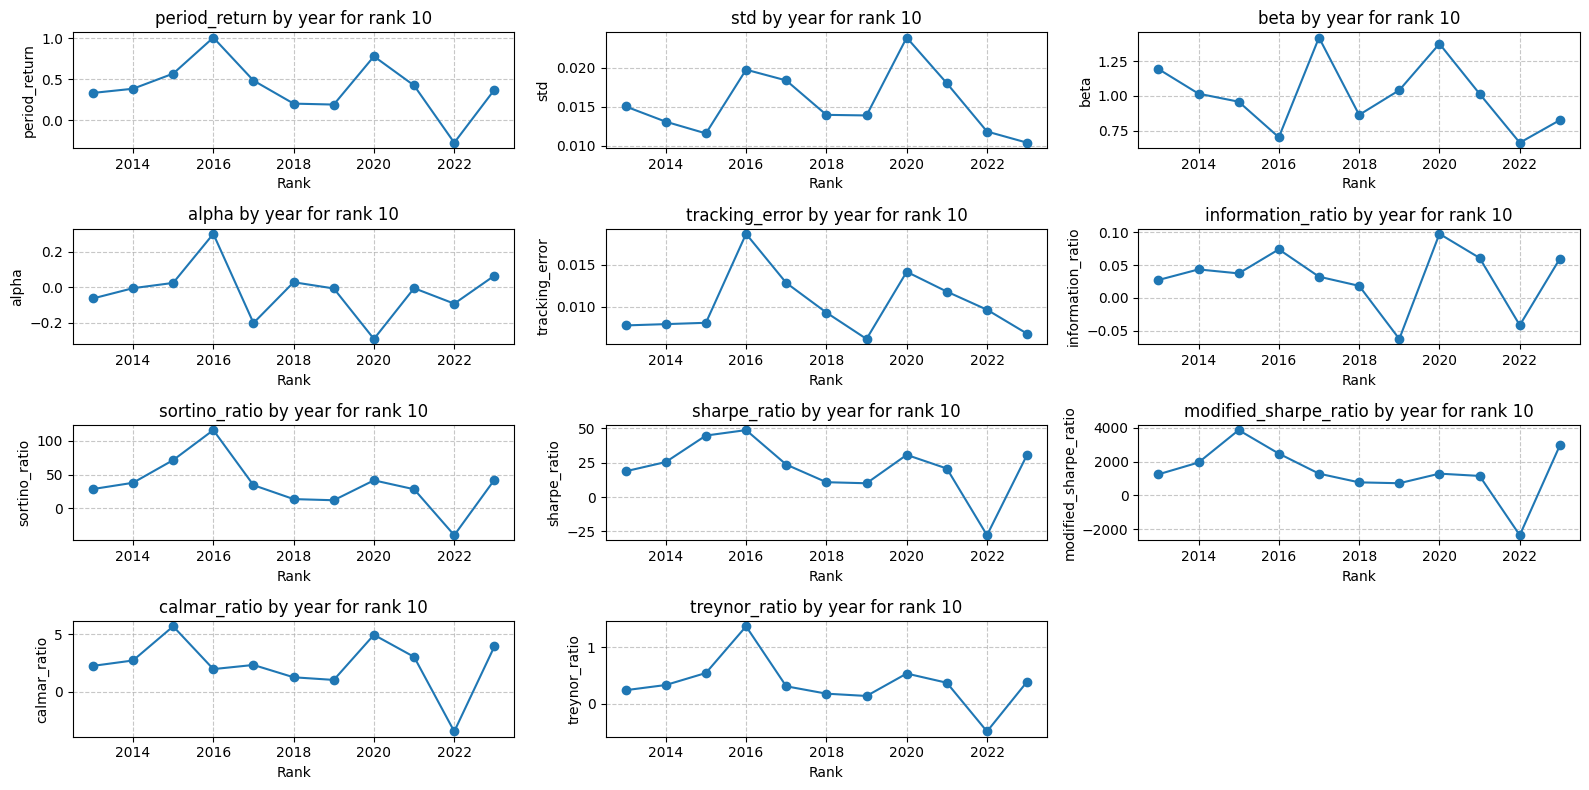

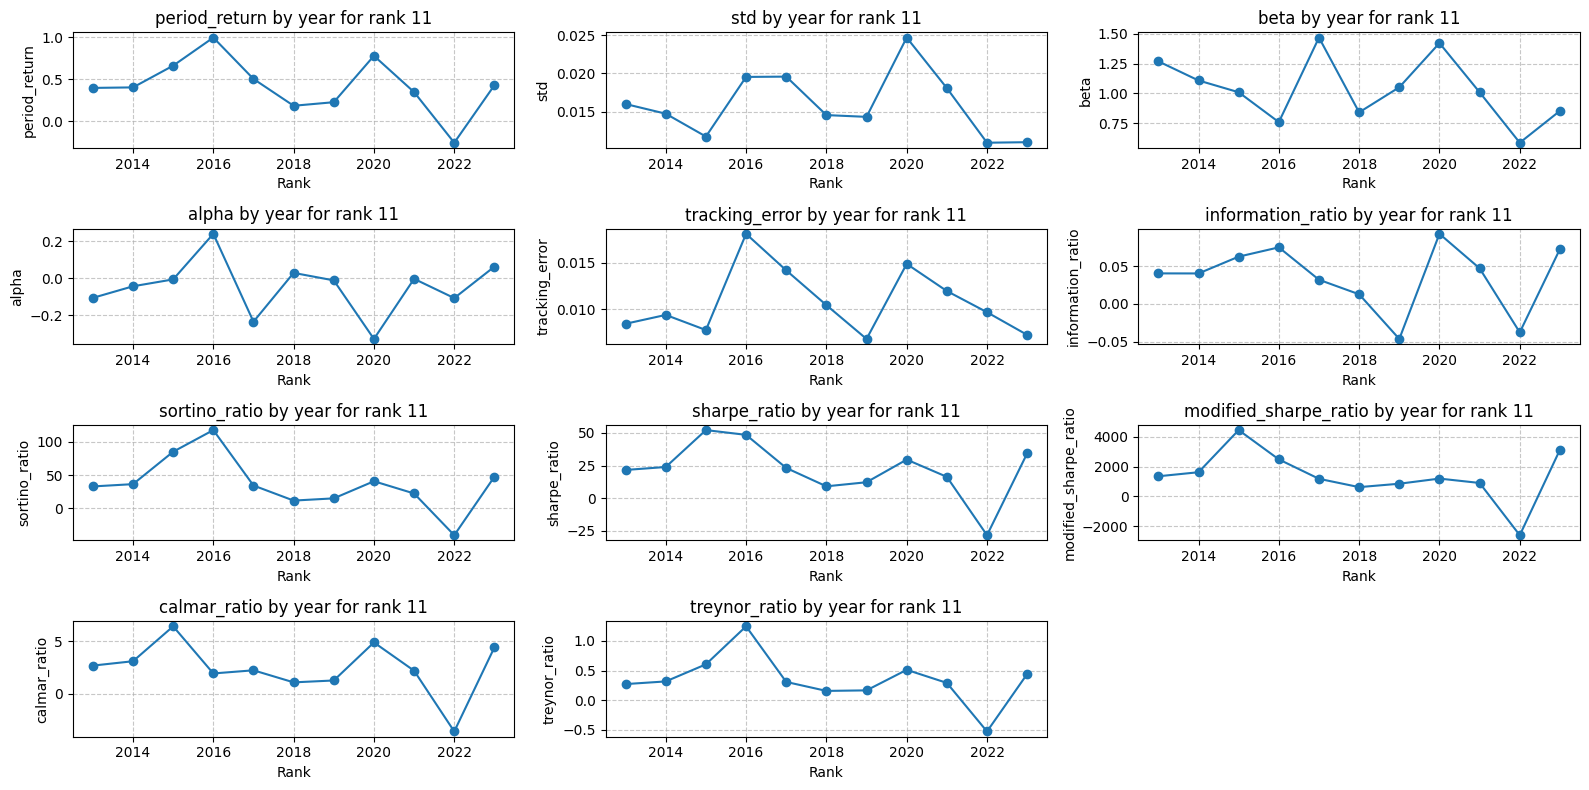

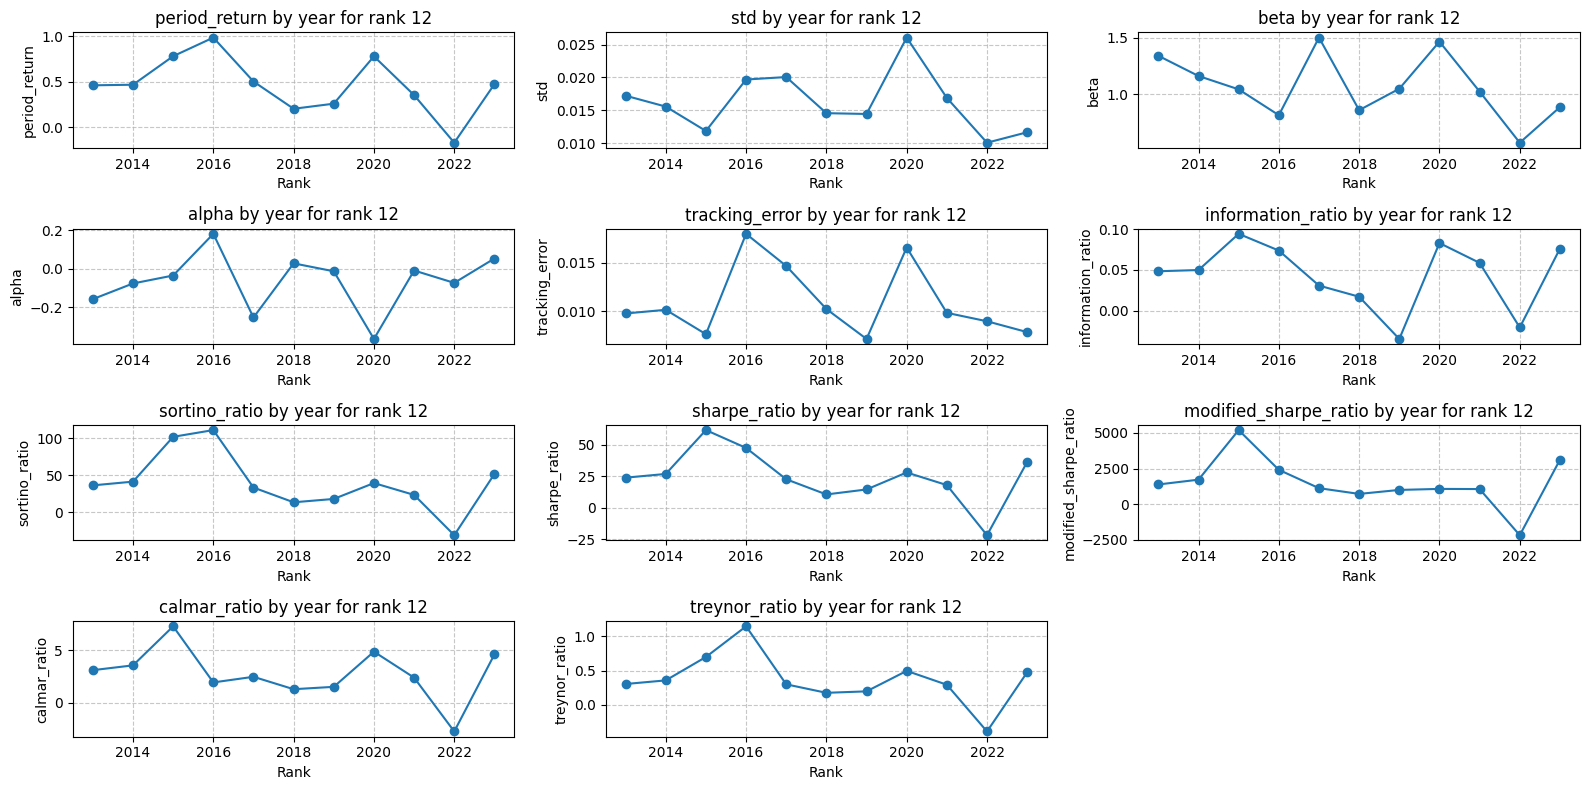

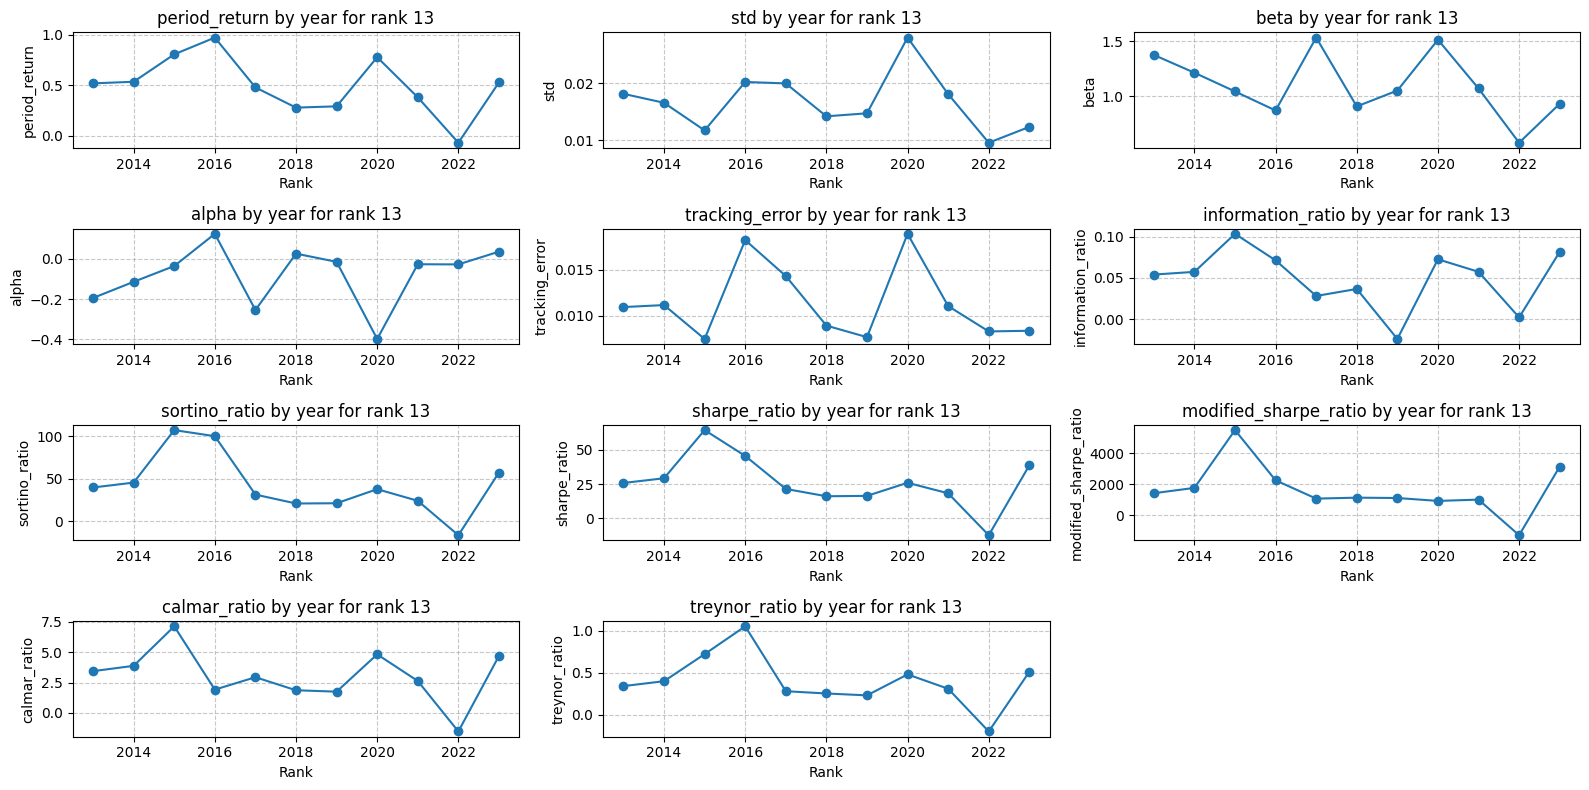

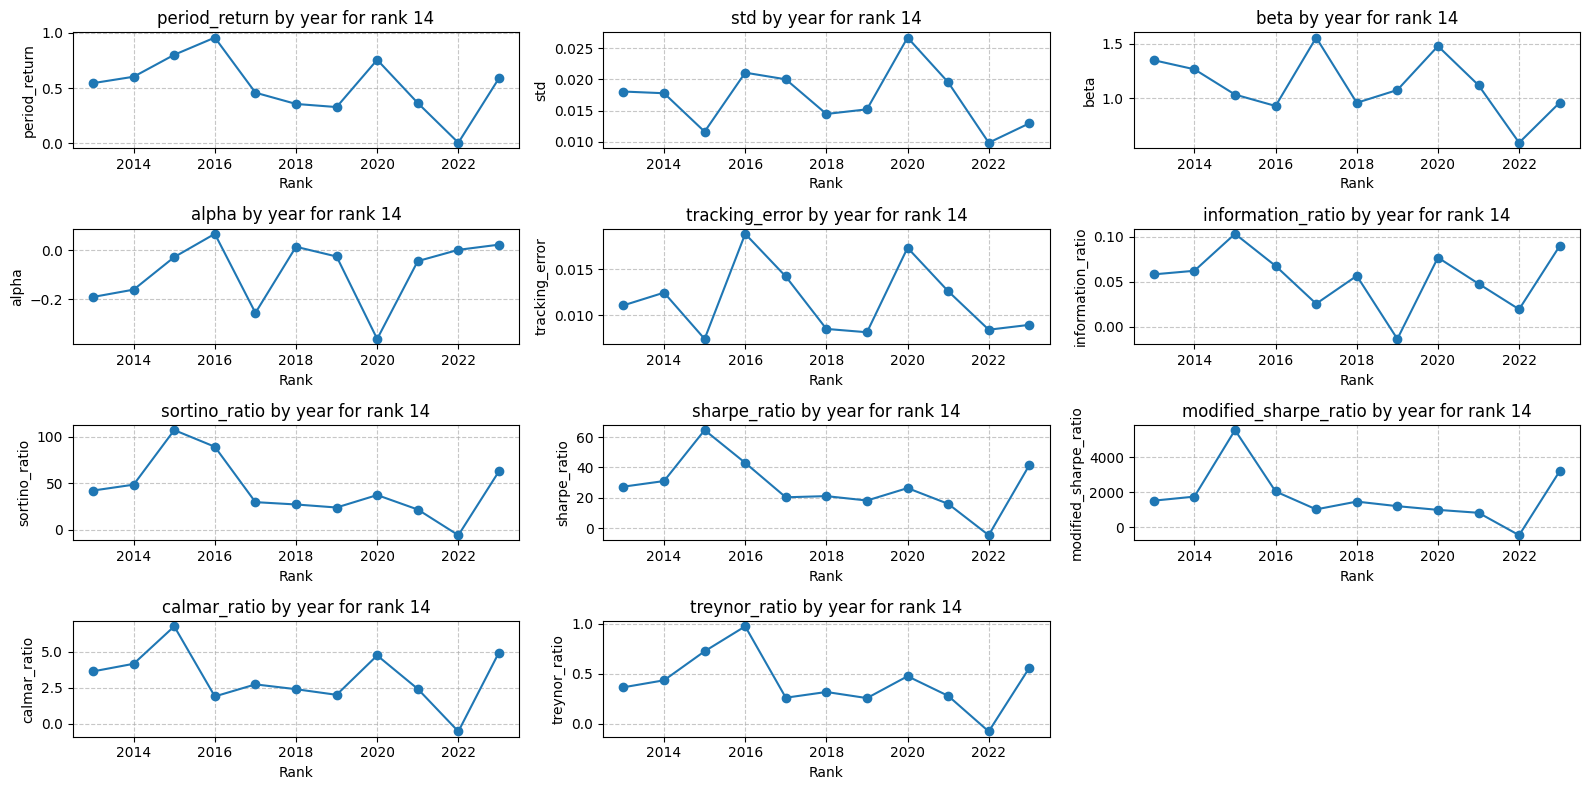

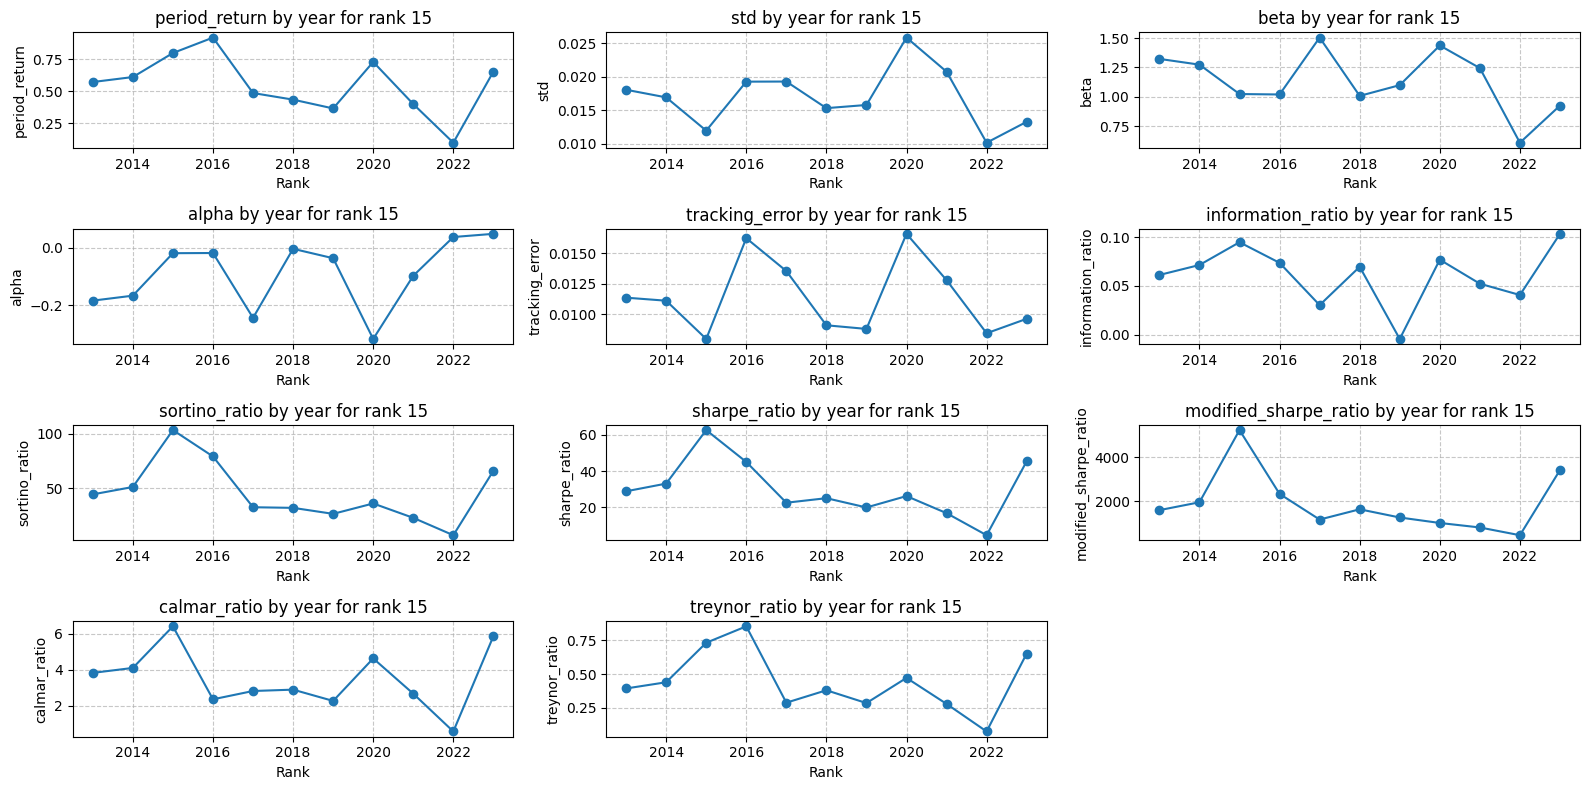

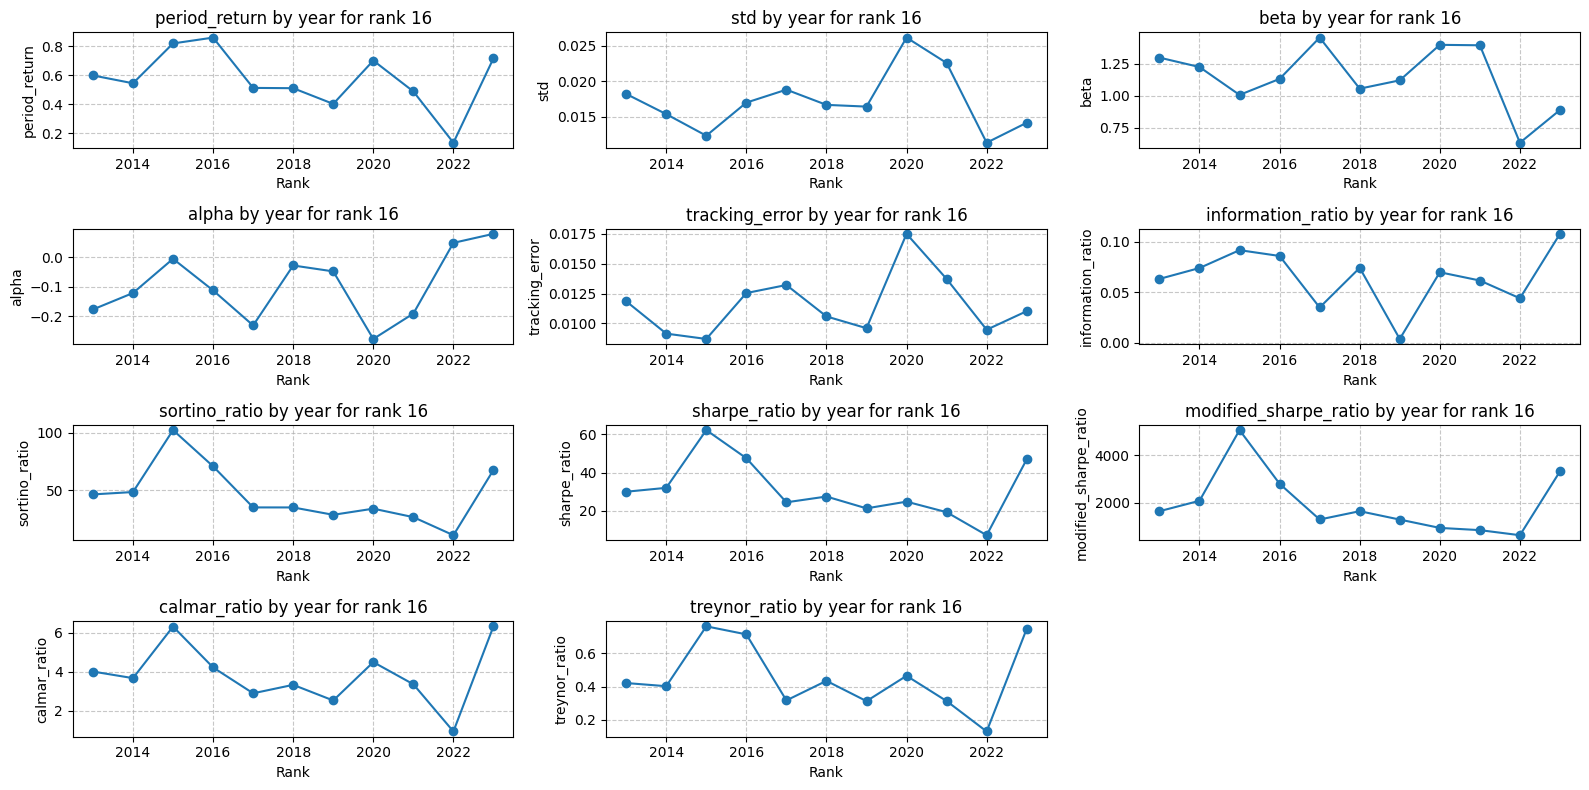

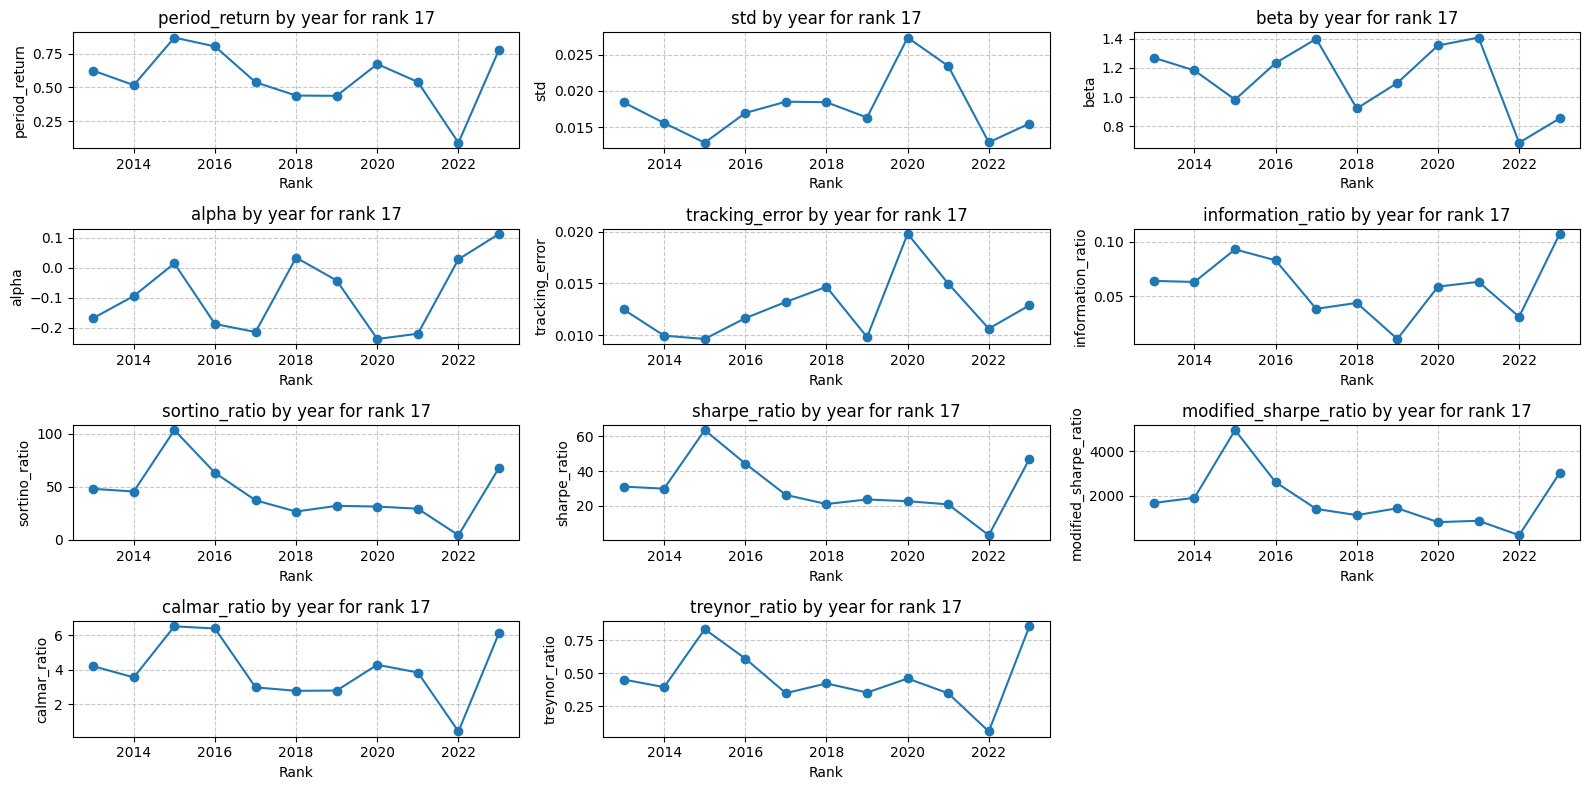

In [17]:
for i in summa['rank'].unique():
    plot_rank_attributes(summa, i, 'all')